In [ ]:
Ideas:

jeffry hinton idea about initializing weights by eyes
    
adding embedding for dh , those non sequential columns  
    
defining h[0] as a Parameter(auto grades) , and as a self.h0
    
sending each charachter to the rnn cell with the index of it 

pre training the rnn cells , predicting the next char

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2`

In [2]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

In [3]:
from fastai.io import *
from fastai.conv_learner import *
from fastai.column_data import *

In [5]:
PATH='D:/FAST.Ai/DL1/'

In [6]:
df = pd.read_csv(f'{PATH}2_class_100_mb.csv', low_memory=False)

In [16]:
df.head(10)

1644373  0.0.0.0 0.0.0.0.1  0  0.1  Tor-100-Website  archive  \
0  1970915  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
1   148906  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
2   541693  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
3  1822385  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
4   217694  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
5   766050  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
6   649042  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
7   114329  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
8  1518265  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
9  1497934  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   

  {(t,0,f,f,f,t,f,f,f,f,0,3332211398,182,1448,f46d04cff2d024e9b3985a4a0800450005dc1aae400030064f81054f4f85c0a8c57001bbcedec69d82c6886b0e05801000b6215100000101080ab7793d6b087948561a72ea4746555d4b8491e58957ef134cbf976f70ff461ecf1e944f52e964d0454cdd0774f79e271f9cc9cff83da7b60d61fd038a62f37c42a56890417d36741b9eb2077ce0570b42301d6913cb1c0dd776ed6f74a4ccb875220475125d93bfa1600a770818f2ff99bcb5fec40307863add4a6ed1f159f6c8a8fe27b5e7ce7bc6b3bca016119562430873bdf32a6ad5b626ea421293093968ddf32525c715e24ab85fe53f6b9d3d5829e0b95e96736f3297022daa311dc71e89ba39827364c8ec01995677315dc40013bdafdacc450e66436a0d30bc3bb3ca336d07fe9d343d7bac73d248c2afa9353c78d4b269e9b1eb35a17e13f9eb076a063a1eebb05c54e3c8a687bb8188059cb38ab3e6a164e0807b1bf312f2104bf2985ac692a1f1aa3fd59edcb479ef64b6baf35c84f50b4aaf0fdb87d4951e034f53b62bfc691d8aa4e119a3a2e68610bf8fac61b897293d4bba65d40790276d1ec33fe1608bb89d42444cf7125e39c093cfd4ebbe4a7270e399a24b9ba143c21f40e9de709e53ba04b83e8ce8edb9e24918e96d47f7c9b0976e913e57d3ba500b16b03aeadc50c8e87f4747cf1b30a5ef28533a0fc4c3c848a319392a5f9020878f0c08be5d96b381af50658bcda8b2f57d8c7909622edeb4eae63606e241dac69381b69c2f7d84fdc4ed21cfda5cdd6beb1d523b69c8342a9a2c3c70e1f49b6b886faac3f0172f1224a843a891f635587481be6e8668a3cbeca5e50689c5f6ea638302246b42f3045c869acf8ae99a77499652bbd08afb723852e99f07f0a9f469b7c7cb489d39e62dcba833cdcdf1f1780776b6214f038b1c4b30236911fdeae4843dd5027a6d2e0e51d4ee36dadd39980418c5400c7eb968d441a92f78c7a213ed9be5176c762f073254e92b391e60fe0cb7c015275f2c18494b94b12779780fcf44c413dcc01ae36d5bdce252f9a262bd95836c1e074e53e177183b45bbabe0b721fe15b16f2b37999082d73b516a879eb42ddf3fdd92223044f2eeb92518ef8f16df2f92b9a1f2394850a5b7187fe71e4c992184e09f659f5637dc67602659f30abf24ab7b3076b0b44bc1c0fbc42296e60712967068254f9d442ebb03115c8a5d3e63a90402e8bb017d7ab19555323a735c625cfdc6b48cd58c327f696937cf0df3adf4acb605b50bc73f48f0fd62d11ac8fe3adc4aa523437610aa65b7b29a18d283026ac5d876c57dde8cd53785a058c79d8a1fd432f5bc5f24f038e91f534d436d9a052a6102e91699a3a7771548c43b8ab0b00abf3516717515c50b6e003e5d387e9b4448df2098aefd22db9d3efdb9de726c95db544e2718440a657d62171adae42d6ce1b29339850147ed79ed7cbda2f6620e6cc2085cde4e67b36488fb747d2f0e7df317c74ce476386437772b5f25a165ac4528e6887f073394b15ccc8326684b1b0bb286f544ccc9ff83967b44e7c54bc9c1b8bc68a4c03612a75730a8b8a8f827e36d9773116a904a3b850531fff51703030fe848e55f0b0345ec2f1b1ca04779a0b3421078f5c5c1089e55f016ea87935b6012dc7d135350b53c85c9992dcc7946f48fa436fbf4f419e9cce964ce858e9981ee51de7fa4ea3117aa3376e26a9f3bd27096a09d385405e5a336dda4c78256dc3b76ab813b1fd91c2d1ac88bb1831da66de1652470d58cb9cf81dc6f09f7c3935b41060054d7494fef73ea2eae30eced9484b64efe4084528196f7fa979eb7a313704551031ca2f1a9edf838ca84333fc0d7a12a8938383def52dc872e01aa780ce093b39bfacd7464444f4d02a54e39273c82f76e38e485e61588211c9fb3ad4192094336a8a8dcbc9169375b533e29f7994ccba4a0e7d77e4a0ec5a3ff4070d2c61f1c172e122c703d7460d7fe160f1eee014e148c7b51d2013c987a3d0967a803d08edf3d0e7a5ed59869f96ea943ab8947d3c0262afdab78c9d90c5dcd21ca1d9fa7d8826860ac7b28c8aef629e9f7121fcb8fb93dea14f1cbe4b4872c1228e5f3dcd51c0328),(t,4.100799560546875e-05,f,f,f,t,f,f,f,f,0,3332212846,182,1448,f46d04cff2d024e9b3985a4a0800450005dc1aaf400030064f80054f4f85c0a8c57001bbcedec69d886e886b0e05801000b6064c00000101080ab7793d6b08794856e3b5bfc9950759b0d5929c

In [58]:
PATH='D:/FAST.Ai/DL1/Data/Sharif/'

In [59]:
df1 = pd.read_csv(f'{PATH}P.csv', low_memory=False)

In [60]:
df1.loc[0]

f46d04cff2d024e9b3985a4a0800450005dc1aba400030064f75054f4f85c0a8c57001bbcedec69dc6a6886b0e05801000b6ccde00000101080ab7793d770879485eb2e978a64b73ba74096ee62a4471260bf5fc92e81a559953cecd13b1fcb32d2644ccc93c357d414dd781ceddfe9b54069f21a41b0858850e16aa0694a9e389865906e1cadc4d41bed38cc6c6b844451b6dd67105e633f61d48893f9a71c471cd5423ded1b2c2892f8ef1308ad1cd2750786e0a7be879760063b02562623b9fa59d47eb37094756199f618c4d586f418758a210f98d9f3a7b3513edb5e41678badcb0e696df4b53768e50b4d1ed1a771362e8ce95d32d1cd1892c0a81b9a650bc4975ddae6923a061de84db84808183f512cd7f69b32221f087cc6f49f738f01c9f748a2b725cb12dc5284f7dce0d827b13e4bd15f305bc225f9965cebeb9c8a944b1add0251b981fe04f1c318beb647364b486e31574dfb00b30d78d811b70d58ecd9accf83c670397a0869e0afc0f1a1108ff012d1e183eb6fc7ea33e08402492d82ec4f9129b29bab441d76096873495cf02a44ca6eb34c8d0a739a9a0ec60c2e25aed387e92b4077032b62d57fa03eb69a3db6b7c3def28bcdbdae3909f1b64fadf080770e06ad03ded04c28a24dd538ce12b94f3ee31cc353025cb89bb0acba01a29b5feb95fba5ea8bacab5652ce474

In [61]:
df1

f46d04cff2d024e9b3985a4a0800450005dc1aba400030064f75054f4f85c0a8c57001bbcedec69dc6a6886b0e05801000b6ccde00000101080ab7793d770879485eb2e978a64b73ba74096ee62a4471260bf5fc92e81a559953cecd13b1fcb32d2644ccc93c357d414dd781ceddfe9b54069f21a41b0858850e16aa0694a9e389865906e1cadc4d41bed38cc6c6b844451b6dd67105e633f61d48893f9a71c471cd5423ded1b2c2892f8ef1308ad1cd2750786e0a7be879760063b02562623b9fa59d47eb37094756199f618c4d586f418758a210f98d9f3a7b3513edb5e41678badcb0e696df4b53768e50b4d1ed1a771362e8ce95d32d1cd1892c0a81b9a650bc4975ddae6923a061de84db84808183f512cd7f69b32221f087cc6f49f738f01c9f748a2b725cb12dc5284f7dce0d827b13e4bd15f305bc225f9965cebeb9c8a944b1add0251b981fe04f1c318beb647364b486e31574dfb00b30d78d811b70d58ecd9accf83c670397a0869e0afc0f1a1108ff012d1e183eb6fc7ea33e08402492d82ec4f9129b29bab441d76096873495cf02a44ca6eb34c8d0a739a9a0ec60c2e25aed387e92b4077032b62d57fa03eb69a3db6b7c3def28bcdbdae3909f1b64fadf080770e06ad03ded04c28a24dd538ce12b94f3ee31cc353025cb89bb0acba01a29b5feb95fba5ea8bacab5652ce47451227fd1d194a095b005a01feb1ed72ae12b44bb8fc87b31bb17460c16937b87f57247ffa05e1de8c495c4a1c107aefcd73d535ee802e2c246cd6eaa1e0ba40523f1b70575780f16e6fcb98d3e95c9c2a49edfd09ef0702133345bf28d3cc3bb71892f30cc6cec47036c2807b5893938b91b1d33ea9b0fc5046e8ff2d1597e730f49d2f3a421509bb09f941e867b0397aa3b1e8b161489ed042a6491eafed316e5a32f9cb4e69caf49613d944cc44ee329a9c1f047c0f6f59af16487b526844ee57c6e6e3f0b94cb82cd8e6f775520b85f814f6766b8656e35e8ed94f3e1a00c268827e78183ee4ad7469df371e7d70c9429955d195deddb1df7d865a32e6967a016936d04d3006b905d31c71716a5d9fb9f0645d1f10614219d6eac43e9a215c9a1f2d13a5f0d601d80c2789e96c5a6dd997fdad9a9c52aa76b8cfd3bbaf26c192f8cd8c6de9cc433a5d5b0b597b5d08b73bed42f3e9270ff1cfcbf9a105f51ba7d45efa553fec12f405ed94824b2e825cd0f1caf38f5a7beb3f22e2efccafcca9e6a086fe262a9586d7995c5126383f9d9575d6e67de016738c0aade4270729cde522312158b5d14fb202c643bd1e293fe2644e2c1aa2a27e602e01d065e03ad3c2cf9d30b4ccac1bbdf4e800d877d9714000d65efc6939f07c7cf7b108b4c1418231bb67ef3be2eeee185b499bb184574888717a1795578c1febce876fc068324b3565183e22c397d32b1f96d7dd53fb0f5751293b9257078b7faa6dc0c013d79c89febda3e7562f61487329cacecddf2740b0c68fd64a645eba46bcc197c3dedfa1334e7bcbe308201221a85e714df4c264a04ae0c165723e6dc563895f356910f4138c8bb4f154b2cc8e142ffc4b6379da0a47f7b275e0e2be0d0ccaa9909a0382afd6f5067ddab1fc74c0c6967b342ac4f8fd321c041bf67d0a2d8db789f355294d18c213f78dcc8634ff22deeadb9fe50976f058fbb70cac3601a26dae715e471db92434d96da406b4f2932053ab72d945dd0042a8a219270c478e1d27a50196ce7a17a8d90f31fff7a0a3ae85118c26eb887349418c5aa0b3ef54ef1ca46f42559c4ccc21d6d27b4016014db801d4eabfb6fc6da02788390748c69b50cf013b83172e2b07e119ebe7fe08d405d940966b37d3f47b584e6c1a4e88204d203ee08ab8e81cd0e2995c5d529f16add8679b8a9ea6fc84595233785257a8261cb254d2d2198782fe487c13660cd58a9d1971f91474537e55dacd6182007d63631c29eb62c5bf94b346f3a8932a361276b3f1f75ccfceb5e2737fde3a8f6e928c9c9e089b00223c47e5faec6b199c8dd6de6fbb5dfba5b0fcb5e5a627dd159fbdd260a6501963574eceab2d91c1703030fe848e55f0b0345ec35a833ea9987e697dd279d335cd4)
0     f46d04cff2d024e9b3985a4a0800450005dc9582400032...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [48]:
types = {'A': 'object'}

In [50]:
df_all = pd.read_csv(f'{PATH}2_class_100_mb.csv' ,dtype = types , infer_datetime_format = True)

In [51]:
df_all

1644373  0.0.0.0 0.0.0.0.1  0  0.1  Tor-100-Website  archive  \
0     1970915  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
1      148906  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
2      541693  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
3     1822385  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
4      217694  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
5      766050  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
6      649042  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
7      114329  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
8     1518265  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
9     1497934  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
10     596242  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
11     849236  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
12    1028372  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
13     586203  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
14    1274802  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
15    1249164  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
16    1569070  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
17    1249094  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
18    1622713  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
19     640665  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
20     719142  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
21    1406720  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
22     862341  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
23    1313621  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
24    1057119  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
25    1597611  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
26     628993  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
27    1572728  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
28     693313  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
29     887048  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
...       ...      ...       ... ..  ...              ...      ...   
2169   213982  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
2170  1918071  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
2171  1694480  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
2172   453827  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
2173  1488370  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
2174  1556664  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
2175  2168111  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
2176   786264  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
2177  2053695  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
2178  1871254  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
2179  1285647  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
2180   967742  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
2181  1416250  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
2182   541681  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
2183   926587  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
2184  1210122  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
2185   149123  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
2186  2149528  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
2187  1285439  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
2188  1212953  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
2189  1785872  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
2190   429610  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
2191   309070  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  youtube   
2192  1210151  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
2193   604841  0.0.0.0   0.0.0.0  0    0  Tor-100-Website  archive   
2194   309047  0

# start

In [2]:
import torch
print(torch.__version__)

0.3.1.post2


In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

from fastai.io import *
from fastai.conv_learner import *
from fastai.column_data import *

from torchtext import vocab, data

from fastai.nlp import *
from fastai.lm_rnn import *

In [2]:
import csv

In [3]:
PATH = "D:/FAST.Ai/DL1/Data/Sharif/"

In [44]:
f = open(f'{PATH}2_class_100_mb.csv','r')
rows = csv.reader(f)

In [45]:
df = pd.DataFrame(columns=np.arange(248))

In [46]:
L = []

In [47]:
for i in range(100):
    x = next(rows)
    z = x[7][1:-1]
    c = z.split(",(")
    c[0] = c[0][1:-1]
    for i in range(1,16):
        c[i] = c[i][:-1]
    G = []
    for i in range(16):
        G += c[i].split(",")
    G = x[:7] + G + x[8:-1]
    L.append(G)
    #print(G,"\n\n\n\n")
    #print(len(G),"\n\n\n\n\n")
    #df.loc[i] = G
    #dh.loc[i] = i

In [48]:
len(L)

100

In [49]:
df = pd.DataFrame(L)
df.head()

0        1        2   3   4                5        6   7   8   9    \
0  1644373  0.0.0.0  0.0.0.0   0   0  Tor-100-Website  archive   t   0   f   
1  1970915  0.0.0.0  0.0.0.0   0   0  Tor-100-Website  youtube   t   0   f   
2   148906  0.0.0.0  0.0.0.0   0   0  Tor-100-Website  youtube   t   0   f   
3   541693  0.0.0.0  0.0.0.0   0   0  Tor-100-Website  archive   t   0   f   
4  1822385  0.0.0.0  0.0.0.0   0   0  Tor-100-Website  archive   t   0   f   

  ... 238 239 240 241 242         243   244   245  \
0 ...   f   f   f   f   0  3332234566   182  1448   
1 ...   f   f   f   f   0   958145148  1061  1448   
2 ...   f   f   f   f   0  1766396614  1452  1448   
3 ...   t   f   f   f   0   202555601   501  1274   
4 ...   f   f   f   f   0  1517459872  1392  1448   

                                                 246 247  
0  f46d04cff2d024e9b3985a4a0800450005dc1abe400030...   2  
1  f46d04cff2d024e9b3985a4a0800450005dc9586400032...   0  
2  2cfda15e920724e9b3985a4a0800450005dcc368400034...   2  
3  f46d04cff2d024e9b3985a4a08004500052e49b8400032...   0  
4  2cfda15e920724e9b3985a4a0800450005dcd28f400027...   0  

[5 rows x 248 columns]

In [82]:
df[[16,17,18,19,20,21,22]]

16 17          18    19    20  \
0   f  0  3332211398   182  1448   
1   f  0   958123428  1061  1448   
2   f  0  1766375992  1452  1448   
3   f  0   202530900   501  1448   
4   f  0  1517438798  1391  1448   
5   f  0  1930276095  1452  1448   
6   f  0  3127253649   182  1448   
7   f  0  1918233790  1452  1448   
8   f  0  2048962168  1452   824   
9   f  0  2898919657  1452  1448   
10  f  0  3562786869  1452  1448   
11  f  0   217032091  1006  1448   
12  f  0  3246815276  1026  1466   
13  f  0  4124539811  1332  1448   
14  f  0  3655867953   772  1460   
15  f  0  1031240022  1452  1448   
16  f  0  1367736885    12  1448   
17  f  0   293150856  1015  1448   
18  f  0  1366154852    12  1448   
19  f  0   526365107   810  2896   
20  f  0    69079682   501  1448   
21  f  0  2338786239  3400  1448   
22  f  0  4187483085   914  1448   
23  f  0  4232644524   831  1460   
24  f  0  4162471835  1430  1448   
25  f  0  1673458327   502   523   
26  f  0  2898974573  1452  1448   
27  f  0  1611747410  1392  2896   
28  f  0  1565428630   810  1448   
29  f  0  3544692162  1452  1448   
.. .. ..         ...   ...   ...   
70  f  0  3493612262  1392  1448   
71  f  0   771831789  1432  1448   
72  f  0  3197291520  1452   469   
73  f  0   214149954  1006  2896   
74  f  0   196145679  1452  1448   
75  f  0  3313080406   753   543   
76  f  0  2560990990   501  2896   
77  f  0  1822824573  1452  1448   
78  f  0   735411770  1452  1448   
79  f  0  1612635716   995  2896   
80  f  0  3361585965  1452  1448   
81  f  0  1145420593   568  1448   
82  f  0  1880788789   182  1448   
83  f  0    72689523  2621  1448   
84  f  0   731869044  1452  1448   
85  f  0  1414194464   726  1448   
86  f  0   412033806  1857  1448   
87  f  0  3841906029   182  2896   
88  f  0  2502498770  1452  1773   
89  f  0  3334370415  1223  1448   
90  f  0   589733975  2007  1448   
91  f  0   752861449  1304  1448   
92  f  0  1162962293   891  1448   
93  f  0  2574685314  4096  1448   
94  f  0  2562295251   501  1448   
95  f  0  4122152120   501  2896   
96  f  0  1808850942  1409  1448   
97  f  0  2561082752   501  1448   
98  f  0  2939358232   182  1448   
99  f  0  4157581453  1430  1448   

                                                   21 22  
0   f46d04cff2d024e9b3985a4a0800450005dc1aae400030...  t  
1   f46d04cff2d024e9b3985a4a0800450005dc9577400032...  t  
2   2cfda15e920724e9b3985a4a0800450005dcc358400034...  t  
3   f46d04cff2d024e9b3985a4a0800450005dc49a4400032...  t  
4   2cfda15e920724e9b3985a4a0800450005dcd27b400027...  t  
5   2cfda15e920724e9b3985a4a0800450005dce32e400030...  t  
6   2cfda15e920724e9b3985a4a0800450005dc6b86400031...  t  
7   2cfda15e920724e9b3985a4a0800450005dcdd38400026...  t  
8   2cfda15e920724e9b3985a4a08004500036cad2e40002d...  t  
9   2cfda15e920724e9b3985a4a0800450005dca0c1400032...  t  
10  2cfda15e920724e9b3985a4a0800450005dcccb8400023...  t  
11  f46d04cff2d024e9b3985a4a0800450005dcc747400032...  t  
12  2cfda15e920724e9b3985a4a0800450005ee000240002f...  t  
13  2cfda15e920724e9b3985a4a0800450005dc3ce040002d...  t  
14  2cfda15e920724e9b3985a4a0800450005dc6bf1400031...  t  
15  2cfda15e920724e9b3985a4a0800450005dc2b6a400032...  t  
16  2cfda15e920724e9b3985a4a0800450005dcb7fb400032...  t  
17  f46d04cff2d024e9b3985a4a0800450005dc3b29400032...  t  
18  2cfda15e920724e9b3985a4a0800450005dcb37d400032...  t  
19  f46d04cff2d024e9b3985a4a080045000b849bc0400032...  t  
20  f46d04cff2d024e9b3985a4a0800450005dc48c0400032...  t  
21  2cfda15e920724e9b3985a4a0800450005dc5e5d40002f...  t  
22  f46d04cff2d024e9b3985a4a0800450005dccead400032...  t  
23  2cfda15e920724e9b3985a4a0800450005dceb43400031...  t  
24  f46d04cff2d024e9b3985a4a0800450005dc6942400032...  t  
25  2cfda15e920724e9b3985a4a08004500023f8e0840002c...  t  
26  2cfda15e920724e9b3985a4a0800450005dc400140002a...  t  
27  2cfda15e920724e9b3985a4a080045000b8493e5400027...  t  
28  f46d04cff2d024e9b3985a4a0800450005dc51ca400032...  t  


In [97]:
15 * 16 +1 +7

248

# start of figuring out is below columns continous or categorical

In [67]:
np.arange(1,2)

array([1])

In [68]:
np.arange(8,247,15)

array([  8,  23,  38,  53,  68,  83,  98, 113, 128, 143, 158, 173, 188, 203, 218, 233])

In [74]:
df_1 = df[np.arange(8,247,15)]

In [77]:
freq = Counter(df_1[c][r]  for c in np.arange(8,247,15) for r in range(100))   
len(freq)

1387

### 2'nd one

In [83]:
np.arange(17,247,15)

array([ 17,  32,  47,  62,  77,  92, 107, 122, 137, 152, 167, 182, 197, 212, 227, 242])

In [84]:
df_2 = df[np.arange(17,247,15)]

In [88]:
(df_2 == '0').all() # all zero 

17     True
32     True
47     True
62     True
77     True
92     True
107    True
122    True
137    True
152    True
167    True
182    True
197    True
212    True
227    True
242    True
dtype: bool

### 3'rd one 

In [89]:
df_3 = df[np.arange(18,247,15)]

In [91]:
freq = Counter(df_3[c][r]  for c in np.arange(18,247,15) for r in range(100))   
len(freq)

1600

### 4'th one 

In [93]:
df_4 = df[np.arange(19,247,15)]

In [94]:
freq = Counter(df_4[c][r]  for c in np.arange(19,247,15) for r in range(100))   
len(freq) # categorical 

57

### 5'th one 

In [95]:
df_5 = df[np.arange(20,247,15)]

In [96]:
freq = Counter(df_5[c][r]  for c in np.arange(20,247,15) for r in range(100))   
len(freq) # categorical 

98

# end 

In [64]:
df = df.drop([1,2,3,4,5],axis=1)

In [65]:
df

0        6   7   8   9   10  11  12  13  14  ... 238 239 240 241 242  \
0   1644373  archive   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
1   1970915  youtube   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
2    148906  youtube   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
3    541693  archive   t   0   f   f   f   t   f   f ...   t   f   f   f   0   
4   1822385  archive   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
5    217694  archive   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
6    766050  youtube   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
7    649042  archive   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
8    114329  archive   t   0   f   f   f   t   t   f ...   f   f   f   f   0   
9   1518265  archive   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
10  1497934  archive   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
11   596242  youtube   t   0   f   f   f   t   f   f ...   t   f   f   f   0   
12   849236  archive   t   0   f   f   f   t   t   f ...   f   f   f   f   0   
13  1028372  youtube   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
14   586203  youtube   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
15  1274802  archive   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
16  1249164  youtube   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
17  1569070  youtube   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
18  1249094  youtube   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
19  1622713  youtube   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
20   640665  youtube   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
21   719142  youtube   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
22  1406720  archive   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
23   862341  archive   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
24  1313621  youtube   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
25  1057119  archive   t   0   f   f   f   t   t   f ...   f   f   f   f   0   
26  1597611  archive   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
27   628993  archive   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
28  1572728  youtube   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
29   693313  archive   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
..      ...      ...  ..  ..  ..  ..  ..  ..  ..  .. ...  ..  ..  ..  ..  ..   
70   751832  youtube   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
71   992738  archive   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
72  2054693  archive   t   0   f   f   f   t   t   f ...   t   f   f   f   0   
73   596124  youtube   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
74  1521248  archive   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
75  1871305  archive   t   0   f   f   f   t   t   f ...   t   f   f   f   0   
76  1321822  archive   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
77   138944  youtube   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
78   635590  youtube   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
79   366434  archive   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
80  1460121  archive   t   0   f   f   f   t   f   f ...   t   f   f   f   0   
81  1707378  archive   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
82    89125  archive   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
83  1351239  youtube   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
84   635435  youtube   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
85  1694479  archive   t   0   f   f   f   t   f   f ...   t   f   f   f   0   
86  1354388  archive   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
87   455286  archive   t   0   f   f   f   t   f   f ...   f   f   f   f   0   
88   176

In [47]:
j = 21
long_columns=[]
for i in range(16):
    long_columns.append(j)
    j = j + 15

In [48]:
long_columns

[21, 36, 51, 66, 81, 96, 111, 126, 141, 156, 171, 186, 201, 216, 231, 246]

In [49]:
len(long_columns)

16

In [50]:
df_long_columns = df[long_columns]

In [51]:
dh = df.copy()

In [52]:
train_cats(dh)

In [53]:
dh,y,nas = proc_df(dh,6)

In [54]:
dh.head()

0    7    8    9    10   11   12   13   14   15  ...   238  239  240  241  \
0   46    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
1   61    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
2   36    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
3   77    1    1    1    1    1    1    1    1    1 ...     2    1    1    1   
4   56    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   

   242  243  244  245  246  247  
0    1   64   20    7   67    3  
1    1   99    3    7   79    1  
2    1   22   18    7   36    3  
3    1   30   27    3   60    1  
4    1   11   13    7   41    1  

[5 rows x 242 columns]

In [55]:
dh.values.shape

(100, 242)

In [56]:
type(y)

numpy.ndarray

In [57]:
md = ColumnarModelData.from_arrays(".", [-1], dh.values.astype(float), y= y,bs=16)

In [58]:
class FirstModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.l_last_out = nn.Linear(242,2)
    def forward(self,*cs):
        x = torch.stack(cs, dim=1)
        print(x.size())
        x = self.l_last_out(x)
        print("x:\n",x)
        print("F.softmax(x):\n",F.softmax(x))
        return(F.softmax(x))

In [59]:
m = FirstModel()

In [60]:
opt = optim.Adam(m.parameters(), 1e-2)

In [61]:
metrics = [accuracy]

In [62]:
fit(m, md, 10, opt, F.nll_loss , metrics = [accuracy])

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]torch.Size([16, 242])
x:
 Variable containing:
-31.1799  -8.5770
-24.7172  12.5417
-31.1556   0.8113
-33.4846  16.6908
-50.1487  13.0369
-42.7696   2.0561
-22.9794  12.7740
-27.3381  -3.8449
-41.2360  21.1024
-31.4017  13.3422
-29.8315  21.1448
-42.8026   5.9185
-40.5103  12.3824
-13.8826  -5.3849
-15.8982   1.6451
-45.7654   7.4519
[torch.FloatTensor of size 16x2]

F.softmax(x):
 Variable containing:
 1.5265e-10  1.0000e+00
 6.5868e-17  1.0000e+00
 1.3091e-14  1.0000e+00
 1.6185e-22  1.0000e+00
 3.6212e-28  1.0000e+00
 3.4075e-20  1.0000e+00
 2.9682e-16  1.0000e+00
 6.2662e-11  1.0000e+00
 8.4485e-28  1.0000e+00
 3.6984e-20  1.0000e+00
 7.2660e-23  1.0000e+00
 6.9292e-22  1.0000e+00
 1.0691e-23  1.0000e+00
 2.0388e-04  9.9980e-01
 2.4046e-08  1.0000e+00
 7.7276e-24  1.0000e+00
[torch.FloatTensor of size 16x2]

 14%|██████████▎                                          


F.softmax(x):
 Variable containing:
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
[torch.FloatTensor of size 16x2]

 57%|█████████████████████████████████████████▏                              | 4/7 [00:00<00:00, 34.28it/s, loss=-.419]torch.Size([16, 242])
x:
 Variable containing:
 -83.6194   44.9246
-102.2151   90.9893
-104.7939   96.1072
 -69.8981   55.3953
 -98.7765   73.2079
 -60.7294   37.5637
 -44.7036   38.4202
 -82.8046   76.2707
 -34.5553   15.2877
 -91.8181   51.0499
 -83.0554   65.0047
 -91.3457   86.3642
-129.3923  110.1575
 -94.8234   63.6404
 -48.5476   36.5976
-104.6458   57.5638
[torch.FloatTensor of size 16x2]

F.softmax(x):
 Variable containing:
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.00


F.softmax(x):
 Variable containing:
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
[torch.FloatTensor of size 16x2]

torch.Size([16, 242])
x:
 Variable containing:
-187.3074  138.9921
-101.2649   84.6362
-138.6861  101.8019
 -95.0557   55.5436
-144.0753  124.3007
-110.0478   74.2789
-176.6077  148.4797
-150.7688  114.2785
-120.5898   80.8814
 -64.0979   45.2052
 -81.7452   74.9017
-169.2357  152.4419
-122.1007  112.8631
-146.3403  132.8795
-138.8489  130.1621
-152.3461  138.8964
[torch.FloatTensor of size 16x2]

F.softmax(x):
 Variable containing:
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
[torch.FloatTensor of size 16x2]

torch.Size


F.softmax(x):
 Variable containing:
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
[torch.FloatTensor of size 16x2]

torch.Size([3, 242])
x:
 Variable containing:
-100.9361   89.1611
 -88.7655   81.9221
 -86.9959   59.3040
[torch.FloatTensor of size 3x2]

F.softmax(x):
 Variable containing:
 0  1
 0  1
 0  1
[torch.FloatTensor of size 3x2]

Validation:   0%|                                                                                | 0/1 [00:00<?, ?it/s]torch.Size([1, 242])
x:
 Variable containing:
-146.2679  143.0815
[torch.FloatTensor of size 1x2]

F.softmax(x):
 Variable containing:
 0  1
[torch.FloatTensor of size 1x2]

    4      -0.405547  -1.0       1.0                                                                                   
  0%|                             


F.softmax(x):
 Variable containing:
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
[torch.FloatTensor of size 16x2]

torch.Size([16, 242])
x:
 Variable containing:
-104.8548   65.3428
 -89.3596   61.6678
-147.8020  120.4272
-174.0685  130.3883
-160.1537  140.3792
-166.9948  146.1866
-128.4565   89.8966
-171.1133  146.9405
 -70.4243   55.3040
-117.5185  102.1489
-151.1548  118.6142
-112.6182   95.9895
-105.1167   90.6139
 -49.2186   29.9511
-101.3330   69.5097
-130.9010  109.8734
[torch.FloatTensor of size 16x2]

F.softmax(x):
 Variable containing:
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
 0.0000  1.0000
[torch.FloatTensor of size 16x2]

torch.Size


F.softmax(x):
 Variable containing:
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
[torch.FloatTensor of size 16x2]

torch.Size([16, 242])
x:
 Variable containing:
 -90.7846   93.4148
-104.6088   92.8338
-122.5244  106.2900
-139.7711  134.7896
-106.4270   96.2537
 -91.7825   84.9390
-143.6057  112.4226
 -91.5911   68.4254
-191.2124  174.4187
-152.4468  119.9063
-104.4151   99.2334
-184.1431  151.0884
-194.2149  153.5012
 -69.6346   56.2897
-149.0117  110.4884
-118.5746  103.2050
[torch.FloatTensor of size 16x2]

F.softmax(x):
 Variable containing:
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
    0     1
[torch.FloatTensor of size 16x2]

 43%|██████████████████████████████▊                                      


Validation:   0%|                                                                                | 0/1 [00:00<?, ?it/s]torch.Size([1, 242])
x:
 Variable containing:
-151.6671  148.4808
[torch.FloatTensor of size 1x2]

F.softmax(x):
 Variable containing:
 0  1
[torch.FloatTensor of size 1x2]

    9      -0.396036  -1.0       1.0                                                                                   



[array([-1.]), 1.0]

In [63]:
it = iter(md.trn_dl)

In [64]:
*xs,y = next(it)

In [65]:
y.shape

torch.Size([16])

In [182]:
m(*V(xs))

torch.Size([16, 242])
x:
 Variable containing:
 197.2628 -190.5182
 218.0031 -214.6370
 131.6231 -120.8322
 259.4224 -251.4293
 179.5795 -179.6994
 157.7902 -139.6948
 270.9621 -258.0655
 195.8976 -192.7886
 253.3432 -241.2991
 203.8265 -190.3844
 161.5755 -173.5065
 151.5946 -149.4159
 176.2560 -162.3946
 152.6863 -150.4954
 105.6414 -108.0266
 126.6108 -118.9006
[torch.FloatTensor of size 16x2]

F.softmax(x):
 Variable containing:
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
[torch.FloatTensor of size 16x2]



Variable containing:
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
    1     0
[torch.FloatTensor of size 16x2]

In [183]:
y


 0
 0
 1
 1
 0
 0
 0
 0
 0
 1
 1
 1
 0
 0
 0
 0
[torch.LongTensor of size 16]

# another model , with log

In [23]:
def rand_t(*sz): return torch.randn(sz)/math.sqrt(sz[1])
def rand_p(*sz): return nn.Parameter(rand_t(*sz))

In [24]:
class secondModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.l_last_out = nn.Linear(242,2)
        #self.W = rand_p(242,2)
        #self.b = rand_p(1,2)
    def forward(self,*cs):
        x = torch.stack(cs, dim=1)
        print(x.size())
        x = self.l_last_out(x)
        #x = x @ self.W + self.b
        print("x:\n",x)
        print("F.log_softmax(x):\n",F.log_softmax(x))
        return(F.log_softmax(x))

In [25]:
m = secondModel()

In [26]:
opt = optim.Adam(m.parameters(), 1e-2)

In [238]:
fit(m, md, 10, opt, F.nll_loss)

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]torch.Size([16, 242])
x:
 Variable containing:
-10.0000  -6.6809
-13.1279 -13.4423
 -4.2908  -8.5425
 -7.5137  -7.7486
  0.5608  -1.4245
 -5.4968  -2.0440
-12.2662  -6.8681
 -8.5932  -4.6505
-13.7746 -10.9586
-12.1127 -14.9767
-24.0968  -7.2482
 -5.0002  -0.7736
 -3.7783  -5.9359
 -6.9711 -15.4511
 -8.8669 -11.0979
-11.3823  -4.1345
[torch.FloatTensor of size 16x2]

F.log_softmax(x):
 Variable containing:
-3.3546e+00 -3.5547e-02
-5.4825e-01 -8.6266e-01
-1.4140e-02 -4.2658e+00
-5.8259e-01 -8.1747e-01
-1.2869e-01 -2.1140e+00
-3.4840e+00 -3.1165e-02
-5.4027e+00 -4.5147e-03
-3.9620e+00 -1.9209e-02
-2.8741e+00 -5.8123e-02
-5.5470e-02 -2.9195e+00
-1.6849e+01 -4.8163e-08
-4.2411e+00 -1.4496e-02
-1.0940e-01 -2.2670e+00
-2.0756e-04 -8.4802e+00
-1.0203e-01 -2.3331e+00
-7.2486e+00 -7.1145e-04
[torch.FloatTensor of size 16x2]

torch.Size([16, 242])
x:
 Variable containing:
 29.459


F.log_softmax(x):
 Variable containing:
  0.0000 -44.2996
  0.0000 -46.8749
  0.0000 -57.0746
  0.0000 -55.1030
 -0.0000 -25.0857
  0.0000 -41.5506
  0.0000 -38.8564
  0.0000 -47.3784
 -0.2714  -1.4368
 -0.0000 -12.7355
 -0.0000 -31.6327
  0.0000 -41.2678
 -0.0000 -15.8324
 -0.0000 -29.4997
 -0.0000 -12.4590
  0.0000 -49.2736
[torch.FloatTensor of size 16x2]

torch.Size([16, 242])
x:
 Variable containing:
  0.8808 -24.4588
  8.2261 -28.9498
  2.3332 -10.3012
  4.7598 -23.9866
 -9.1472  -4.1514
 15.1814 -35.5585
 -0.7397  -3.9662
 -7.5090 -10.0654
 15.4740 -26.6960
  1.7903 -28.8797
-16.2896  -6.2173
  4.3701 -23.4832
-10.5227  -9.2081
  5.6391 -12.1937
 -1.5971 -18.0174
 15.1437 -31.2303
[torch.FloatTensor of size 16x2]

F.log_softmax(x):
 Variable containing:
 -0.0000 -25.3396
  0.0000 -37.1759
 -0.0000 -12.6344
 -0.0000 -28.7465
 -5.0025  -0.0067
  0.0000 -50.7399
 -0.0389  -3.2654
 -0.0747  -2.6311
  0.0000 -42.1699
 -0.0000 -30.6700
-10.0724  -0.0000
 -0.0000 -27.8533
 -1.5524  -0


 43%|███████████████████████████████▎                                         | 3/7 [00:00<00:00, 28.92it/s, loss=5.13]torch.Size([16, 242])
x:
 Variable containing:
  1.2945 -17.3242
 -1.1149  -6.4104
 -6.1926  -1.3483
  1.8579  -9.6807
 -2.8640  -1.8367
  0.9148 -16.3766
  3.1447 -24.8677
  1.1708 -29.7162
  0.1969 -12.1101
  0.2395 -16.9203
 -1.7552 -16.4036
  1.2036 -23.2544
 -7.2498  -1.4853
 -0.8558 -16.7627
  2.8807 -18.1430
 -9.5897  -6.7493
[torch.FloatTensor of size 16x2]

F.log_softmax(x):
 Variable containing:
-8.2037e-09 -1.8619e+01
-5.0015e-03 -5.3005e+00
-4.8521e+00 -7.8428e-03
-9.7467e-06 -1.1539e+01
-1.3333e+00 -3.0598e-01
-3.0932e-08 -1.7291e+01
-6.8301e-13 -2.8012e+01
-3.8636e-14 -3.0887e+01
-4.5200e-06 -1.2307e+01
-3.5284e-08 -1.7160e+01
-4.3477e-07 -1.4648e+01
-2.3880e-11 -2.4458e+01
-5.7676e+00 -3.1320e-03
-1.2351e-07 -1.5907e+01
-7.4052e-10 -2.1024e+01
-2.8972e+00 -5.6761e-02
[torch.FloatTensor of size 16x2]

torch.Size([16, 242])
x:
 Variable containing:
 -0.49


torch.Size([3, 242])
x:
 Variable containing:
  1.7237 -21.6885
  3.0792 -18.5410
 -2.5477 -15.0709
[torch.FloatTensor of size 3x2]

F.log_softmax(x):
 Variable containing:
-6.7949e-11 -2.3412e+01
-4.0779e-10 -2.1620e+01
-3.6412e-06 -1.2523e+01
[torch.FloatTensor of size 3x2]

Validation:   0%|                                                                                | 0/1 [00:00<?, ?it/s]torch.Size([1, 242])
x:
 Variable containing:
 -2.6187 -21.3392
[torch.FloatTensor of size 1x2]

F.log_softmax(x):
 Variable containing:
-7.4093e-09 -1.8721e+01
[torch.FloatTensor of size 1x2]

    5      4.69336    18.720526                                                                                        
  0%|                                                                                            | 0/7 [00:00<?, ?it/s]torch.Size([16, 242])
x:
 Variable containing:
 -5.5361 -14.1946
  3.4717 -17.5978
  7.7778 -11.3932
  2.9194 -22.8842
 -2.6837 -12.8331
 -6.5414 -13.0731
  6.1985 -18.1


torch.Size([16, 242])
x:
 Variable containing:
 -7.6221 -11.5122
 -0.0970 -20.4768
-16.1674   3.3341
-11.9776  -7.7532
  3.0759 -25.2630
  2.5059 -10.3287
  6.5274 -22.5571
 -1.5637 -17.2948
 -7.0827  -1.3296
  6.1733 -32.4369
 -6.8617   2.1610
  3.4581 -22.6849
-10.0613  -7.5573
 -0.9983 -17.1605
-10.0852  -7.4892
 -5.3396 -27.5539
[torch.FloatTensor of size 16x2]

F.log_softmax(x):
 Variable containing:
 -0.0202  -3.9103
 -0.0000 -20.3798
-19.5015  -0.0000
 -4.2389  -0.0145
 -0.0000 -28.3388
 -0.0000 -12.8347
 -0.0000 -29.0845
 -0.0000 -15.7312
 -5.7562  -0.0032
  0.0000 -38.6102
 -9.0228  -0.0001
 -0.0000 -26.1430
 -2.5826  -0.0786
 -0.0000 -16.1622
 -2.6680  -0.0719
 -0.0000 -22.2143
[torch.FloatTensor of size 16x2]

 43%|███████████████████████████████▎                                         | 3/7 [00:00<00:00, 28.11it/s, loss=3.97]torch.Size([16, 242])
x:
 Variable containing:
 -0.7955 -20.9274
 -2.3784 -26.1670
  9.0839 -15.2515
 -0.2080  -6.3466
 -0.5002 -26.3264
 -5.5760  -1


torch.Size([16, 242])
x:
 Variable containing:
 -5.4439 -23.8775
 -5.3708 -22.9893
  0.8295  -6.6033
 -3.6617  -1.0389
 -2.3837 -24.0525
 -7.9687  -0.7664
 -5.2570  -3.8249
 -1.7681 -11.4756
 -2.6132 -17.9606
 -2.8014  -3.9055
  0.2831 -19.5099
 -3.1494  -6.4339
 -7.3598  -4.2836
 -6.0856 -13.0275
 -7.3887  -6.4359
 -3.1109  -3.9663
[torch.FloatTensor of size 16x2]

F.log_softmax(x):
 Variable containing:
-9.8719e-09 -1.8434e+01
-2.2304e-08 -1.7619e+01
-5.9134e-04 -7.4334e+00
-2.6929e+00 -7.0087e-02
-3.8849e-10 -2.1669e+01
-7.2031e+00 -7.4454e-04
-1.6463e+00 -2.1414e-01
-6.0820e-05 -9.7076e+00
-2.1613e-07 -1.5347e+01
-2.8633e-01 -1.3904e+00
-2.5351e-09 -1.9793e+01
-3.6774e-02 -3.3213e+00
-3.1213e+00 -4.5102e-02
-9.6599e-04 -6.9428e+00
-1.2790e+00 -3.2618e-01
-3.5426e-01 -1.2096e+00
[torch.FloatTensor of size 16x2]

torch.Size([3, 242])
x:
 Variable containing:
  1.2047 -12.5095
 -5.1910 -14.9932
 -2.2240  -9.6502
[torch.FloatTensor of size 3x2]

F.log_softmax(x):
 Variable containing:

[array([8.42148])]

In [240]:
it = iter(md.trn_dl)

In [241]:
*xs,y = next(it)

In [242]:
y.shape

torch.Size([16])

In [243]:
probs =m(*V(xs))

torch.Size([16, 242])
x:
 Variable containing:
 -0.6819 -10.9355
 -6.7260 -10.9378
 -5.2431 -14.9411
 -9.3748 -10.2397
 -2.1548   0.2884
 -1.6809 -11.5628
 -2.9180  -4.9048
 -2.5717 -14.2599
 -5.3191  -9.4640
  3.3188 -22.5081
 -3.7323  -4.6799
 -8.9250 -10.8058
 -6.0864  -0.8392
 -2.8503  -4.6750
 -1.9250  -4.7819
 -8.1339  -1.5766
[torch.FloatTensor of size 16x2]

F.log_softmax(x):
 Variable containing:
-3.5231e-05 -1.0254e+01
-1.4711e-02 -4.2265e+00
-6.1405e-05 -9.6980e+00
-3.5142e-01 -1.2163e+00
-2.5266e+00 -8.3308e-02
-5.1090e-05 -9.8819e+00
-1.2852e-01 -2.1153e+00
-8.3929e-06 -1.1688e+01
-1.5721e-02 -4.1606e+00
-6.0743e-12 -2.5827e+01
-3.2763e-01 -1.2752e+00
-1.4190e-01 -2.0228e+00
-5.2525e+00 -5.2483e-03
-1.4951e-01 -1.9742e+00
-5.5858e-02 -2.9127e+00
-6.5587e+00 -1.4187e-03
[torch.FloatTensor of size 16x2]



In [244]:
preds = np.array(probs.data).argmax(1)

In [245]:
y 


 0
 1
 0
 1
 1
 0
 0
 0
 1
 0
 0
 1
 1
 1
 1
 1
[torch.LongTensor of size 16]

In [246]:
np.array(y)

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [247]:
preds

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [248]:
(np.array(y) == preds).mean()

0.625

In [249]:
np.array(y) == preds

array([ True, False,  True, False,  True,  True,  True,  True, False,  True,  True, False,  True, False,
       False,  True])

# one rnn for for all the long_columns

In [66]:
dh[long_columns]=df_long_columns

In [67]:
dh.head()

0    7    8    9    10   11   12   13   14   15  ...   238  239  240  241  \
0   46    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
1   61    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
2   36    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
3   77    1    1    1    1    1    1    1    1    1 ...     2    1    1    1   
4   56    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   

   242 243  244  245                                                246  247  
0    1  64   20    7  f46d04cff2d024e9b3985a4a0800450005dc1abe400030...    3  
1    1  99    3    7  f46d04cff2d024e9b3985a4a0800450005dc9586400032...    1  
2    1  22   18    7  2cfda15e920724e9b3985a4a0800450005dcc368400034...    3  
3    1  30   27    3  f46d04cff2d024e9b3985a4a08004500052e49b8400032...    1  
4    1  11   13    7  2cfda15e920724e9b3985a4a0800450005dcd28f400027...    1  

[5 rows x 242 columns]

In [68]:
len(dh[long_columns[-2]][10])

2246

In [69]:
len(dh[long_columns[-2]][0])

3000

In [70]:
q = pd.DataFrame([[6,7],[8,9]])
q

0  1
0  6  7
1  8  9

In [71]:
p = pd.DataFrame([[1,2],[3,4]])
p

0  1
0  1  2
1  3  4

In [72]:
E = pd.concat([p,q],axis=1)

In [73]:
E

0  1  0  1
0  1  2  6  7
1  3  4  8  9

In [74]:
E[:][:1]

0  1  0  1
0  1  2  6  7

In [75]:
t_e = T(E)
t_e


 1  2  6  7
 3  4  8  9
[torch.LongTensor of size 2x4]

In [76]:
t_e[:,3:]


 7
 9
[torch.LongTensor of size 2x1]

In [77]:
V_e = V(t_e)
V_e

Variable containing:
 1  2  6  7
 3  4  8  9
[torch.LongTensor of size 2x4]

In [78]:
V_e[:,3]

Variable containing:
 7
 9
[torch.LongTensor of size 2]

In [79]:
new_v = torch.cat((V_e,V_e),1)
new_v

Variable containing:
    1     2     6     7     1     2     6     7
    3     4     8     9     3     4     8     9
[torch.LongTensor of size 2x8]

In [80]:
new_v.transpose(0,1)

Variable containing:
    1     3
    2     4
    6     8
    7     9
    1     3
    2     4
    6     8
    7     9
[torch.LongTensor of size 8x2]

In [81]:
p[1][0]

2

In [82]:
freq = Counter(char  for c in long_columns for r in range(100) for char in dh[c][r])   
itos = [o for o,c in freq.most_common(len(freq))]

In [83]:
itos.insert(0, '_unk')
itos.insert(1, '_eos')
itos.insert(2, '_pad')
stoi = collections.defaultdict(lambda:0 , {v:k for k,v in enumerate(itos)})

In [84]:
itos

['_unk',
 '_eos',
 '_pad',
 '0',
 '8',
 '4',
 'a',
 '2',
 'c',
 '5',
 '9',
 '3',
 '1',
 'f',
 'e',
 'd',
 'b',
 '7',
 '6']

In [85]:
len(itos)

19

In [204]:
stoi["f"]

13

In [205]:
long2num = pd.DataFrame([[stoi[char] for c in long_columns for char in dh[c][r] ]+[1]  for r in range(100)])

In [206]:
long2num

0      1      2      3      4      5      6      7      8      9      \
0      13      5     18     15      3      5      8     13     13      7   
1      13      5     18     15      3      5      8     13     13      7   
2       7      8     13     15      6     12      9     14     10      7   
3      13      5     18     15      3      5      8     13     13      7   
4       7      8     13     15      6     12      9     14     10      7   
5       7      8     13     15      6     12      9     14     10      7   
6       7      8     13     15      6     12      9     14     10      7   
7       7      8     13     15      6     12      9     14     10      7   
8       7      8     13     15      6     12      9     14     10      7   
9       7      8     13     15      6     12      9     14     10      7   
10      7      8     13     15      6     12      9     14     10      7   
11     13      5     18     15      3      5      8     13     13      7   
12      7      8     13     15      6     12      9     14     10      7   
13      7      8     13     15      6     12      9     14     10      7   
14      7      8     13     15      6     12      9     14     10      7   
15      7      8     13     15      6     12      9     14     10      7   
16      7      8     13     15      6     12      9     14     10      7   
17     13      5     18     15      3      5      8     13     13      7   
18      7      8     13     15      6     12      9     14     10      7   
19     13      5     18     15      3      5      8     13     13      7   
20     13      5     18     15      3      5      8     13     13      7   
21      7      8     13     15      6     12      9     14     10      7   
22     13      5     18     15      3      5      8     13     13      7   
23      7      8     13     15      6     12      9     14     10      7   
24     13      5     18     15      3      5      8     13     13      7   
25      7      8     13     15      6     12      9     14     10      7   
26      7      8     13     15      6     12      9     14     10      7   
27      7      8     13     15      6     12      9     14     10      7   
28     13      5     18     15      3      5      8     13     13      7   
29      7      8     13     15      6     12      9     14     10      7   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
70      7      8     13     15      6     12      9     14     10      7   
71      7      8     13     15      6     12      9     14     10      7   
72      7      8     13     15      6     12      9     14     10      7   
73     13      5     18     15      3      5      8     13     13      7   
74      7      8     13     15      6     12      9     14     10      7   
75     13      5     18     15      3      5      8     13     13      7   
76     13      5     18     15      3      5      8     13     13      7   
77      7      8     13     15      6     12      9     14     10      7   
78      7      8     13     15      6     12      9     14     10      7   
79     13      5     18     15      3      5      8     13     13      7   
80      7      8     13     15      6     12      9     14     10      7   
81     13      5     18     15      3      5      8     13     13      7   
82     13      5     18     15      3      5      8     13     13      7   
83      7      8     13     15      6     12      9     14     10      7   
84      7      8     13     15      6     12      9     14     10      7   
85      7      8     13     15      6     12      9     14     10      7   
86     13      5     18     15      3      5      8     13     13      7   
87     13      5     18     15      3      5      8     13     13      7   
88      7      8     13     15      6     12      9     14     10      7   
89     13      5     18     15      3      5      8     13     13      7   
90     13      5     18     15      3      5      8 

In [207]:
long2num.shape

(100, 48001)

In [208]:
long2num = long2num.fillna(2)

In [209]:
type(long2num)

pandas.core.frame.DataFrame

In [210]:
long2num = long2num[[i for i in range(1000)]] # because of limitation of computation in this laptop
long2num

0    1    2    3    4    5    6    7    8    9   ...   990  991  992  993  \
0    13    5   18   15    3    5    8   13   13    7 ...     8   11    8    4   
1    13    5   18   15    3    5    8   13   13    7 ...     3   10   13    4   
2     7    8   13   15    6   12    9   14   10    7 ...     7    3    3    7   
3    13    5   18   15    3    5    8   13   13    7 ...    17   14   14    4   
4     7    8   13   15    6   12    9   14   10    7 ...    11    5    6   17   
5     7    8   13   15    6   12    9   14   10    7 ...     6   16   14   17   
6     7    8   13   15    6   12    9   14   10    7 ...     3    9    6    8   
7     7    8   13   15    6   12    9   14   10    7 ...     5   15    4   11   
8     7    8   13   15    6   12    9   14   10    7 ...     4   16    7   12   
9     7    8   13   15    6   12    9   14   10    7 ...     8    7    6   13   
10    7    8   13   15    6   12    9   14   10    7 ...    17   13    3   18   
11   13    5   18   15    3    5    8   13   13    7 ...    18   17   11   11   
12    7    8   13   15    6   12    9   14   10    7 ...     9   17   12    3   
13    7    8   13   15    6   12    9   14   10    7 ...     4   12   15   11   
14    7    8   13   15    6   12    9   14   10    7 ...    14    7   10   17   
15    7    8   13   15    6   12    9   14   10    7 ...     6    7    7   16   
16    7    8   13   15    6   12    9   14   10    7 ...     8   16   14    8   
17   13    5   18   15    3    5    8   13   13    7 ...     7   16   13   13   
18    7    8   13   15    6   12    9   14   10    7 ...    12    8    8   11   
19   13    5   18   15    3    5    8   13   13    7 ...    18    4   16    6   
20   13    5   18   15    3    5    8   13   13    7 ...    10    4    9    5   
21    7    8   13   15    6   12    9   14   10    7 ...     9   14    3   17   
22   13    5   18   15    3    5    8   13   13    7 ...     3   16    4   16   
23    7    8   13   15    6   12    9   14   10    7 ...    16   14   17    6   
24   13    5   18   15    3    5    8   13   13    7 ...    17   10   12   10   
25    7    8   13   15    6   12    9   14   10    7 ...     9    6   13    7   
26    7    8   13   15    6   12    9   14   10    7 ...    17   16   14   11   
27    7    8   13   15    6   12    9   14   10    7 ...    14    8   12   13   
28   13    5   18   15    3    5    8   13   13    7 ...     5   15   17   12   
29    7    8   13   15    6   12    9   14   10    7 ...     6    7   14    9   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ...   ...  ...  ...  ...   
70    7    8   13   15    6   12    9   14   10    7 ...     5   15   14    3   
71    7    8   13   15    6   12    9   14   10    7 ...     5   13    3    3   
72    7    8   13   15    6   12    9   14   10    7 ...     3   12   17   11   
73   13    5   18   15    3    5    8   13   13    7 ...     5    9    3    5   
74    7    8   13   15    6   12    9   14   10    7 ...     4   16   11    8   
75   13    5   18   15    3    5    8   13   13    7 ...    16   13    5    5   
76   13    5   18   15    3    5    8   13   13    7 ...     6   12    8   13   
77    7    8   13   15    6   12    9   14   10    7 ...    17    6   16   13   
78    7    8   13   15    6   12    9   14   10    7 ...    18   15    5   12   
79   13    5   18   15    3    5    8   13   13    7 ...    16   16    4   18   
80    7    8   13   15    6   12    9   14   10    7 ...     3    7    7   14   
81   13    5   18   15    3    5    8   13   13    7 ...    16   10   16   13   
82   13    5   18   15    3    5    8   13   13    7 ...     6    3    5    9   
83    7    8   13   15    6   12    9   14   10    7 ...    14    7   16   17   
84    7    8   13   15    6   12    9   14   10    7 ...     6   17    4   14   
85    7    8   13   15    6   12    9   14   10    7 ...     5    4   12   16   
86   13    5   18   15    3    5    8   13   13    7 ...     4    4   17    9   
87   13    5   18   15    3    5   

In [131]:
len(long_columns)

16

In [132]:
247+1 - (16 + 6 )

226

In [299]:
dh = dh.drop(long_columns,axis=1)

In [300]:
dh

0    7    8    9    10   11   12   13   14   15  ...   237  238  239  240  \
0    46    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
1    61    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
2    36    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
3    77    1    1    1    1    1    1    1    1    1 ...     1    2    1    1   
4    56    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
5    67    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
6    91    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
7    86    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
8    10    1    1    1    1    1    1    2    1    1 ...     1    1    1    1   
9    38    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
10   37    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
11   80    1    1    1    1    1    1    1    1    1 ...     1    2    1    1   
12   92    1    1    1    1    1    1    2    1    1 ...     1    1    1    1   
13    3    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
14   78    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
15   18    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
16   14    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
17   41    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
18   13    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
19   45    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
20   85    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
21   89    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
22   31    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
23   93    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
24   22    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
25    5    1    1    1    1    1    1    2    1    1 ...     1    1    1    1   
26   44    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
27   82    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
28   43    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
29   87    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ...   ...  ...  ...  ...   
70   90    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
71  100    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
72   63    1    1    1    1    1    1    2    1    1 ...     1    2    1    1   
73   79    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
74   39    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
75   59    1    1    1    1    1    1    2    1    1 ...     1    2    1    1   
76   23    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
77   30    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
78   84    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
79   71    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
80   33    1    1    1    1    1    1    1    1    1 ...     1    2    1    1   
81   49    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
82   98    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
83   26    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
84   83    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
85   48    1    1    1    1    1    1    1    1    1 ...     1    2    1    1   
86   29    1    1    1    1    1    1    1    1    1 ...     1    1    1    1   
87   73    1    1    1    1    1   

In [135]:
#dh[2][0]

In [136]:
T(dh)


   46     1     1  ...     20     7     3
   61     1     1  ...      3     7     1
   36     1     1  ...     18     7     3
       ...          ⋱          ...       
   24     1     1  ...     27    11     2
    9     1     1  ...     20     7     1
   20     1     1  ...     15     7     2
[torch.LongTensor of size 100x226]

In [137]:
new_df = pd.concat([dh,long2num],axis=1)

In [138]:
t_new_df=T(new_df)

In [139]:
new_df.to_pickle(f'{PATH}tmp/new_df')

In [4]:
new_df = pd.read_pickle(f'{PATH}tmp/new_df')

In [141]:
new_df

0    7    8    9    10   11   12   13   14   15  ...   990  991  992  993  \
0    46    1    1    1    1    1    1    1    1    1 ...     8   11    8    4   
1    61    1    1    1    1    1    1    1    1    1 ...     3   10   13    4   
2    36    1    1    1    1    1    1    1    1    1 ...     7    3    3    7   
3    77    1    1    1    1    1    1    1    1    1 ...    17   14   14    4   
4    56    1    1    1    1    1    1    1    1    1 ...    11    5    6   17   
5    67    1    1    1    1    1    1    1    1    1 ...     6   16   14   17   
6    91    1    1    1    1    1    1    1    1    1 ...     3    9    6    8   
7    86    1    1    1    1    1    1    1    1    1 ...     5   15    4   11   
8    10    1    1    1    1    1    1    2    1    1 ...     4   16    7   12   
9    38    1    1    1    1    1    1    1    1    1 ...     8    7    6   13   
10   37    1    1    1    1    1    1    1    1    1 ...    17   13    3   18   
11   80    1    1    1    1    1    1    1    1    1 ...    18   17   11   11   
12   92    1    1    1    1    1    1    2    1    1 ...     9   17   12    3   
13    3    1    1    1    1    1    1    1    1    1 ...     4   12   15   11   
14   78    1    1    1    1    1    1    1    1    1 ...    14    7   10   17   
15   18    1    1    1    1    1    1    1    1    1 ...     6    7    7   16   
16   14    1    1    1    1    1    1    1    1    1 ...     8   16   14    8   
17   41    1    1    1    1    1    1    1    1    1 ...     7   16   13   13   
18   13    1    1    1    1    1    1    1    1    1 ...    12    8    8   11   
19   45    1    1    1    1    1    1    1    1    1 ...    18    4   16    6   
20   85    1    1    1    1    1    1    1    1    1 ...    10    4    9    5   
21   89    1    1    1    1    1    1    1    1    1 ...     9   14    3   17   
22   31    1    1    1    1    1    1    1    1    1 ...     3   16    4   16   
23   93    1    1    1    1    1    1    1    1    1 ...    16   14   17    6   
24   22    1    1    1    1    1    1    1    1    1 ...    17   10   12   10   
25    5    1    1    1    1    1    1    2    1    1 ...     9    6   13    7   
26   44    1    1    1    1    1    1    1    1    1 ...    17   16   14   11   
27   82    1    1    1    1    1    1    1    1    1 ...    14    8   12   13   
28   43    1    1    1    1    1    1    1    1    1 ...     5   15   17   12   
29   87    1    1    1    1    1    1    1    1    1 ...     6    7   14    9   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ...   ...  ...  ...  ...   
70   90    1    1    1    1    1    1    1    1    1 ...     5   15   14    3   
71  100    1    1    1    1    1    1    1    1    1 ...     5   13    3    3   
72   63    1    1    1    1    1    1    2    1    1 ...     3   12   17   11   
73   79    1    1    1    1    1    1    1    1    1 ...     5    9    3    5   
74   39    1    1    1    1    1    1    1    1    1 ...     4   16   11    8   
75   59    1    1    1    1    1    1    2    1    1 ...    16   13    5    5   
76   23    1    1    1    1    1    1    1    1    1 ...     6   12    8   13   
77   30    1    1    1    1    1    1    1    1    1 ...    17    6   16   13   
78   84    1    1    1    1    1    1    1    1    1 ...    18   15    5   12   
79   71    1    1    1    1    1    1    1    1    1 ...    16   16    4   18   
80   33    1    1    1    1    1    1    1    1    1 ...     3    7    7   14   
81   49    1    1    1    1    1    1    1    1    1 ...    16   10   16   13   
82   98    1    1    1    1    1    1    1    1    1 ...     6    3    5    9   
83   26    1    1    1    1    1    1    1    1    1 ...    14    7   16   17   
84   83    1    1    1    1    1    1    1    1    1 ...     6   17    4   14   
85   48    1    1    1    1    1    1    1    1    1 ...     5    4   12   16   
86   29    1    1    1    1    1    1    1    1    1 ...     4    4   17    9   
87   73    1    1    1    1    1   

In [142]:
np.save(f'{PATH}tmp/y.npy', y)

In [129]:
y = np.load(f'{PATH}tmp/y.npy')

In [144]:
md = ColumnarModelData.from_arrays(".", [-1], new_df.values, y= y,bs=4)#.astype(float) .astype(LongTensor)

In [145]:
n_hidden = 30
n_classes = 2
numOfNunSeqCol = 226
n_fac = 10

In [146]:
class FirstNlpModel(nn.Module):
    def __init__(self,vocab_size, n_fac):
        super().__init__()
        
        self.e = nn.Embedding(vocab_size, n_fac)
        self.rnn = nn.GRU(n_fac, n_hidden)
        self.l_out = nn.Linear(n_hidden+numOfNunSeqCol ,n_classes)
        
    def forward(self,*cs):
        x = torch.stack(cs, dim=1)#.long()
        x = x.transpose(0,1)
        #print("x:   \n",x.size(),"\n",x)
        bs = cs[0].size(0)
        h = V(torch.zeros(1, bs, n_hidden))
        print("slice:\n",x[226:,:]) #print((V(torch.stack(x[226:,:]))))
        inp = self.e(x[226:,:]) # ? #inp = self.e(V(torch.stack(x[226:,:])))
        #print("inp: \n",inp.size())
        outp,h = self.rnn(inp, h)
        
        #print("x:   \n",x.size())
        print("outp is:  \n",outp[-1])
        x = torch.cat((x[:226,:].transpose(0,1).float(),outp[-1]),1)
        
        #what is the type of inp , outp , x ,  how to concatinate 
        
        #print("F.log_softmax(x):\n",F.log_softmax(x))
        x = self.l_out(x)
        x = F.log_softmax(x)
        print("alaki")
        return(x)

In [147]:
m = FirstNlpModel(19,n_fac) # 19 is equal to len(itos)

In [148]:
opt = optim.Adam(m.parameters(), 1e-2)

In [149]:
metrics = [accuracy]

In [150]:
fit(m, md, 1, opt, F.nll_loss)

  0%|                                                                                           | 0/25 [00:00<?, ?it/s]x:   
 torch.Size([1226, 4]) 
 Variable containing:
   88    17     5    38
    1     1     1     1
    1     1     1     1
           ⋮            
   10    16    10     4
   13    18    14     9
    7     5     3     6
[torch.LongTensor of size 1226x4]

slice:
 Variable containing:
    7     7     7     7
    8     8     8     8
   13    13    13    13
           ⋮            
   10    16    10     4
   13    18    14     9
    7     5     3     6
[torch.LongTensor of size 1000x4]

outp is:  
 Variable containing:

Columns 0 to 9 
-0.1025  0.2966 -0.0935  0.1502  0.1952  0.1232 -0.1046 -0.1385 -0.5282 -0.4602
 0.1294  0.1980 -0.1484 -0.2281  0.1371 -0.0967  0.0399 -0.0003  0.0440  0.2982
 0.1364  0.0546 -0.2334 -0.1288  0.2892 -0.1224  0.2745  0.0987  0.0086  0.1829
 0.0524  0.1822  0.0117 -0.0592  0.3748 -0.0770  0.1889 -0.1056 -0.2752  0.0807

Columns 10 to 19 
-0.


alaki
 20%|██████████████▍                                                         | 5/25 [00:01<00:07,  2.77it/s, loss=14.5]x:   
 torch.Size([1226, 4]) 
 Variable containing:
   53    10    22    96
    1     1     1     1
    1     1     1     1
           ⋮            
    8    14    10     3
   11     7     9    12
   13     4    17    17
[torch.LongTensor of size 1226x4]

slice:
 Variable containing:
   13     7    13    13
    5     8     5     5
   18    13    18    18
           ⋮            
    8    14    10     3
   11     7     9    12
   13     4    17    17
[torch.LongTensor of size 1000x4]

outp is:  
 Variable containing:

Columns 0 to 9 
 0.2431 -0.0853 -0.1580 -0.0099 -0.1510  0.1907  0.2340 -0.0123 -0.3751  0.0372
-0.0288  0.2211 -0.0104  0.0229  0.1602 -0.0776 -0.1192  0.1337 -0.2251  0.0703
 0.1385  0.0225 -0.1311 -0.0101  0.0442  0.0646  0.0109  0.1608 -0.1838  0.0949
 0.0640  0.0066 -0.1426  0.0788 -0.0352 -0.0485 -0.0852  0.3164  0.0802 -0.0012

Columns 10 to 


alaki
 40%|████████████████████████████▍                                          | 10/25 [00:03<00:04,  3.02it/s, loss=8.85]x:   
 torch.Size([1226, 4]) 
 Variable containing:
   81    55    60    85
    1     1     1     1
    1     1     1     1
           ⋮            
   10     4    16    15
    6    10    17    14
    7    17    15     8
[torch.LongTensor of size 1226x4]

slice:
 Variable containing:
   13    13    13    13
    5     5     5     5
   18    18    18    18
           ⋮            
   10     4    16    15
    6    10    17    14
    7    17    15     8
[torch.LongTensor of size 1000x4]

outp is:  
 Variable containing:

Columns 0 to 9 
 0.0796  0.2262 -0.1623 -0.2627  0.0502  0.2822 -0.2733  0.1099 -0.1269 -0.1937
 0.1501  0.0463 -0.0113  0.0106 -0.0418  0.1334 -0.1344  0.2146 -0.2525  0.0150
 0.0552 -0.1624  0.1344  0.2928 -0.3202 -0.0746 -0.1366  0.2294  0.4520 -0.2025
 0.0429 -0.0109  0.1986 -0.0816  0.1521 -0.1219  0.0974 -0.1258  0.0548  0.3930

Columns 10 to 


alaki
 60%|███████████████████████████████████████████▏                            | 15/25 [00:05<00:03,  2.91it/s, loss=6.6]x:   
 torch.Size([1226, 4]) 
 Variable containing:
   49    91    57    90
    1     1     1     1
    1     1     1     1
           ⋮            
   10    13    18     5
   17    13    16    15
    6    13     4    13
[torch.LongTensor of size 1226x4]

slice:
 Variable containing:
   13     7     7     7
    5     8     8     8
   18    13    13    13
           ⋮            
   10    13    18     5
   17    13    16    15
    6    13     4    13
[torch.LongTensor of size 1000x4]

outp is:  
 Variable containing:

Columns 0 to 9 
 0.1319  0.1559 -0.0245 -0.1545 -0.0581  0.2111 -0.2503  0.1109 -0.0285  0.0495
 0.1129 -0.3288 -0.0279  0.3150 -0.4257  0.2826  0.1049 -0.1065 -0.4757 -0.1598
 0.0267  0.1326  0.2008  0.0756  0.1971 -0.2210 -0.0653  0.0615 -0.0377  0.2633
 0.0379 -0.1839  0.0221  0.2939 -0.1815  0.0072  0.0986 -0.0109 -0.0773 -0.1916

Columns 10 to 


alaki
 80%|████████████████████████████████████████████████████████▊              | 20/25 [00:06<00:01,  3.11it/s, loss=5.54]x:   
 torch.Size([1226, 4]) 
 Variable containing:
   89    65    82    41
    1     1     1     1
    1     1     1     1
           ⋮            
   18     7    16    14
   10     3    13     7
   12    13     4     8
[torch.LongTensor of size 1226x4]

slice:
 Variable containing:
    7    13     7    13
    8     5     8     5
   13    18    13    18
           ⋮            
   18     7    16    14
   10     3    13     7
   12    13     4     8
[torch.LongTensor of size 1000x4]

outp is:  
 Variable containing:

Columns 0 to 9 
-0.1011  0.1927 -0.0822 -0.0889 -0.0472 -0.0344  0.0032  0.3490 -0.0037 -0.0260
 0.0899  0.0299 -0.1080  0.0080 -0.2088  0.1242  0.0214  0.1604 -0.0698 -0.1068
 0.0369 -0.0146  0.1125  0.1055  0.0545  0.0160  0.0763  0.1636 -0.2544  0.1719
 0.0194  0.1382  0.0827 -0.2198  0.1416  0.1038 -0.0428 -0.0604  0.0408  0.2391

Columns 10 to 

[array([8.31996])]

# several rnns for each part of the long_columns 

In [86]:
freq = Counter(char  for c in long_columns for r in range(100) for char in dh[c][r])   
itos = [o for o,c in freq.most_common(len(freq))]

In [87]:
itos.insert(0, '_unk')
itos.insert(1, '_eos')
itos.insert(2, 'p')
stoi = collections.defaultdict(lambda:0 , {v:k for k,v in enumerate(itos)})

In [88]:
itos

['_unk',
 '_eos',
 'p',
 '0',
 '8',
 '4',
 'a',
 '2',
 'c',
 '5',
 '9',
 '3',
 '1',
 'f',
 'e',
 'd',
 'b',
 '7',
 '6']

In [257]:
long_col_df = dh[long_columns]
long_col_df

21   \
0   f46d04cff2d024e9b3985a4a0800450005dc1aae400030...   
1   f46d04cff2d024e9b3985a4a0800450005dc9577400032...   
2   2cfda15e920724e9b3985a4a0800450005dcc358400034...   
3   f46d04cff2d024e9b3985a4a0800450005dc49a4400032...   
4   2cfda15e920724e9b3985a4a0800450005dcd27b400027...   
5   2cfda15e920724e9b3985a4a0800450005dce32e400030...   
6   2cfda15e920724e9b3985a4a0800450005dc6b86400031...   
7   2cfda15e920724e9b3985a4a0800450005dcdd38400026...   
8   2cfda15e920724e9b3985a4a08004500036cad2e40002d...   
9   2cfda15e920724e9b3985a4a0800450005dca0c1400032...   
10  2cfda15e920724e9b3985a4a0800450005dcccb8400023...   
11  f46d04cff2d024e9b3985a4a0800450005dcc747400032...   
12  2cfda15e920724e9b3985a4a0800450005ee000240002f...   
13  2cfda15e920724e9b3985a4a0800450005dc3ce040002d...   
14  2cfda15e920724e9b3985a4a0800450005dc6bf1400031...   
15  2cfda15e920724e9b3985a4a0800450005dc2b6a400032...   
16  2cfda15e920724e9b3985a4a0800450005dcb7fb400032...   
17  f46d04cff2d024e9b3985a4a0800450005dc3b29400032...   
18  2cfda15e920724e9b3985a4a0800450005dcb37d400032...   
19  f46d04cff2d024e9b3985a4a080045000b849bc0400032...   
20  f46d04cff2d024e9b3985a4a0800450005dc48c0400032...   
21  2cfda15e920724e9b3985a4a0800450005dc5e5d40002f...   
22  f46d04cff2d024e9b3985a4a0800450005dccead400032...   
23  2cfda15e920724e9b3985a4a0800450005dceb43400031...   
24  f46d04cff2d024e9b3985a4a0800450005dc6942400032...   
25  2cfda15e920724e9b3985a4a08004500023f8e0840002c...   
26  2cfda15e920724e9b3985a4a0800450005dc400140002a...   
27  2cfda15e920724e9b3985a4a080045000b8493e5400027...   
28  f46d04cff2d024e9b3985a4a0800450005dc51ca400032...   
29  2cfda15e920724e9b3985a4a0800450005dccbbb400027...   
..                                                ...   
70  2cfda15e920724e9b3985a4a0800450005dc589d40002b...   
71  2cfda15e920724e9b3985a4a0800450005dcd64740002e...   
72  2cfda15e920724e9b3985a4a080045000209b13e400032...   
73  f46d04cff2d024e9b3985a4a080045000b84bf33400032...   
74  2cfda15e920724e9b3985a4a0800450005dc85ca400032...   
75  f46d04cff2d024e9b3985a4a080045000253fdaf400032...   
76  f46d04cff2d024e9b3985a4a080045000b84a57c400032...   
77  2cfda15e920724e9b3985a4a0800450005dc99e5400024...   
78  2cfda15e920724e9b3985a4a0800450005dc076540002b...   
79  f46d04cff2d024e9b3985a4a080045000b849bcd400032...   
80  2cfda15e920724e9b3985a4a0800450005dc3c1d400032...   
81  f46d04cff2d024e9b3985a4a0800450005dca98e400032...   
82  f46d04cff2d024e9b3985a4a0800450005dc0b14400030...   
83  2cfda15e920724e9b3985a4a0800450005dc8115400031...   
84  2cfda15e920724e9b3985a4a0800450005dcfd7740002b...   
85  2cfda15e920724e9b3985a4a0800450005dcfddf400031...   
86  f46d04cff2d024e9b3985a4a0800450005dc302b400032...   
87  f46d04cff2d024e9b3985a4a080045000b84521c400030...   
88  2cfda15e920724e9b3985a4a0800450007217e18400031...   
89  f46d04cff2d024e9b3985a4a0800450005dc0564400032...   
90  f46d04cff2d024e9b3985a4a0800450005dc4c0e400032...   
91  f46d04cff2d024e9b3985a4a0800450005dc6693400032...   
92  f46d04cff2d024e9b3985a4a0800450005dcf17f400032...   
93  2cfda15e920724e9b3985a4a0800450005dce16a40002e...   
94  f46d04cff2d024e9b3985a4a0800450005dca97c400032...   
95  f46d04cff2d024e9b3985a4a080045000b84c17c400032...   
96  2cfda15e920724e9b3985a4a0800450005dc1534400028...   
97  f46d04cff2d024e9b3985a4a0800450005dca5be400032...   
98  f46d04cff2d024e9b3985a4a0800450005dcb8d7400030...   
99  f46d04cff2d024e9b3985a4a0800450005dc5b69400032...   

                                                  36   \
0   f46d04cff2d024e9b3985a4a0800450005dc1aaf400030...   
1   f46d04cff2d024e9b3985a4a0800450005dc9578400032...   
2   2cfda15e920724e9b3985a4a0800450005dcc359400034...   
3   f46d04cff2d024e9b3985a4a0800450005dc49a5400032...   
4   2cfda15e920724e9b3985a4a0800450000bdd27c400027...   
5   2cfda15e920724e9b3985a4a0800450005dce32f400030...   
6   2cfda15e920724e9b3985a4a0800450005dc6b87400031...   
7   2cfda15e920724e9b3985a4a08004500030fdd39400026...   
8 

In [247]:
dg = pd.DataFrame([[1,2],[3,4],[5,6]])
dg

0  1
0  1  2
1  3  4
2  5  6

In [238]:
len_long_col_df = pd.DataFrame(np.zeros((100,len(long_columns))) , columns=long_columns)

In [239]:
for r in range(100):
    for c in long_columns:
         len_long_col_df[c][r] = len(long_col_df[c][r])

In [243]:
len_long_col_df.max(0)

21     3000.0
36     3000.0
51     3000.0
66     3000.0
81     3000.0
96     3000.0
111    3000.0
126    3000.0
141    3000.0
156    3000.0
171    3000.0
186    3000.0
201    3000.0
216    3000.0
231    3000.0
246    3000.0
dtype: float64

In [259]:
t = 'test'
t.rjust(10, '0')
#'000000test'

'000000test'

In [9]:
t = 'tested'
t.rjust(4, '0')
#'000000test'

'tested'

In [262]:
for r in range(100):
    for c in long_columns:
        long_col_df[c][r] = long_col_df[c][r].rjust(3000, 'p')
        
        
        
# there is 

C:\Users\Lenovo\Anaconda3\envs\fastai\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [266]:
long_col_df

21   \
0   f46d04cff2d024e9b3985a4a0800450005dc1aae400030...   
1   f46d04cff2d024e9b3985a4a0800450005dc9577400032...   
2   2cfda15e920724e9b3985a4a0800450005dcc358400034...   
3   f46d04cff2d024e9b3985a4a0800450005dc49a4400032...   
4   2cfda15e920724e9b3985a4a0800450005dcd27b400027...   
5   2cfda15e920724e9b3985a4a0800450005dce32e400030...   
6   2cfda15e920724e9b3985a4a0800450005dc6b86400031...   
7   2cfda15e920724e9b3985a4a0800450005dcdd38400026...   
8   pppppppppppppppppppppppppppppppppppppppppppppp...   
9   2cfda15e920724e9b3985a4a0800450005dca0c1400032...   
10  2cfda15e920724e9b3985a4a0800450005dcccb8400023...   
11  f46d04cff2d024e9b3985a4a0800450005dcc747400032...   
12  2cfda15e920724e9b3985a4a0800450005ee000240002f...   
13  2cfda15e920724e9b3985a4a0800450005dc3ce040002d...   
14  2cfda15e920724e9b3985a4a0800450005dc6bf1400031...   
15  2cfda15e920724e9b3985a4a0800450005dc2b6a400032...   
16  2cfda15e920724e9b3985a4a0800450005dcb7fb400032...   
17  f46d04cff2d024e9b3985a4a0800450005dc3b29400032...   
18  2cfda15e920724e9b3985a4a0800450005dcb37d400032...   
19  f46d04cff2d024e9b3985a4a080045000b849bc0400032...   
20  f46d04cff2d024e9b3985a4a0800450005dc48c0400032...   
21  2cfda15e920724e9b3985a4a0800450005dc5e5d40002f...   
22  f46d04cff2d024e9b3985a4a0800450005dccead400032...   
23  2cfda15e920724e9b3985a4a0800450005dceb43400031...   
24  f46d04cff2d024e9b3985a4a0800450005dc6942400032...   
25  pppppppppppppppppppppppppppppppppppppppppppppp...   
26  2cfda15e920724e9b3985a4a0800450005dc400140002a...   
27  2cfda15e920724e9b3985a4a080045000b8493e5400027...   
28  f46d04cff2d024e9b3985a4a0800450005dc51ca400032...   
29  2cfda15e920724e9b3985a4a0800450005dccbbb400027...   
..                                                ...   
70  2cfda15e920724e9b3985a4a0800450005dc589d40002b...   
71  2cfda15e920724e9b3985a4a0800450005dcd64740002e...   
72  pppppppppppppppppppppppppppppppppppppppppppppp...   
73  f46d04cff2d024e9b3985a4a080045000b84bf33400032...   
74  2cfda15e920724e9b3985a4a0800450005dc85ca400032...   
75  pppppppppppppppppppppppppppppppppppppppppppppp...   
76  f46d04cff2d024e9b3985a4a080045000b84a57c400032...   
77  2cfda15e920724e9b3985a4a0800450005dc99e5400024...   
78  2cfda15e920724e9b3985a4a0800450005dc076540002b...   
79  f46d04cff2d024e9b3985a4a080045000b849bcd400032...   
80  2cfda15e920724e9b3985a4a0800450005dc3c1d400032...   
81  f46d04cff2d024e9b3985a4a0800450005dca98e400032...   
82  f46d04cff2d024e9b3985a4a0800450005dc0b14400030...   
83  2cfda15e920724e9b3985a4a0800450005dc8115400031...   
84  2cfda15e920724e9b3985a4a0800450005dcfd7740002b...   
85  2cfda15e920724e9b3985a4a0800450005dcfddf400031...   
86  f46d04cff2d024e9b3985a4a0800450005dc302b400032...   
87  f46d04cff2d024e9b3985a4a080045000b84521c400030...   
88  2cfda15e920724e9b3985a4a0800450007217e18400031...   
89  f46d04cff2d024e9b3985a4a0800450005dc0564400032...   
90  f46d04cff2d024e9b3985a4a0800450005dc4c0e400032...   
91  f46d04cff2d024e9b3985a4a0800450005dc6693400032...   
92  f46d04cff2d024e9b3985a4a0800450005dcf17f400032...   
93  2cfda15e920724e9b3985a4a0800450005dce16a40002e...   
94  f46d04cff2d024e9b3985a4a0800450005dca97c400032...   
95  f46d04cff2d024e9b3985a4a080045000b84c17c400032...   
96  2cfda15e920724e9b3985a4a0800450005dc1534400028...   
97  f46d04cff2d024e9b3985a4a0800450005dca5be400032...   
98  f46d04cff2d024e9b3985a4a0800450005dcb8d7400030...   
99  f46d04cff2d024e9b3985a4a0800450005dc5b69400032...   

                                                  36   \
0   f46d04cff2d024e9b3985a4a0800450005dc1aaf400030...   
1   f46d04cff2d024e9b3985a4a0800450005dc9578400032...   
2   2cfda15e920724e9b3985a4a0800450005dcc359400034...   
3   f46d04cff2d024e9b3985a4a0800450005dc49a5400032...   
4   pppppppppppppppppppppppppppppppppppppppppppppp...   
5   2cfda15e920724e9b3985a4a0800450005dce32f400030...   
6   2cfda15e920724e9b3985a4a0800450005dc6b87400031...   
7   pppppppppppppppppppppppppppppppppppppppppppppp...   
8 

In [264]:
long_col_df.to_pickle(f'{PATH}tmp/long_col_df')

In [26]:
long_col_df = pd.read_pickle(f'{PATH}tmp/long_col_df')

In [89]:
long2num = pd.DataFrame([[stoi[char] for c in long_columns for char in long_col_df[c][r]]  for r in range(100)])

In [90]:
long2num

0      1      2      3      4      5      6      7      8      9      \
0      13      5     18     15      3      5      8     13     13      7   
1      13      5     18     15      3      5      8     13     13      7   
2       7      8     13     15      6     12      9     14     10      7   
3      13      5     18     15      3      5      8     13     13      7   
4       7      8     13     15      6     12      9     14     10      7   
5       7      8     13     15      6     12      9     14     10      7   
6       7      8     13     15      6     12      9     14     10      7   
7       7      8     13     15      6     12      9     14     10      7   
8       2      2      2      2      2      2      2      2      2      2   
9       7      8     13     15      6     12      9     14     10      7   
10      7      8     13     15      6     12      9     14     10      7   
11     13      5     18     15      3      5      8     13     13      7   
12      7      8     13     15      6     12      9     14     10      7   
13      7      8     13     15      6     12      9     14     10      7   
14      7      8     13     15      6     12      9     14     10      7   
15      7      8     13     15      6     12      9     14     10      7   
16      7      8     13     15      6     12      9     14     10      7   
17     13      5     18     15      3      5      8     13     13      7   
18      7      8     13     15      6     12      9     14     10      7   
19     13      5     18     15      3      5      8     13     13      7   
20     13      5     18     15      3      5      8     13     13      7   
21      7      8     13     15      6     12      9     14     10      7   
22     13      5     18     15      3      5      8     13     13      7   
23      7      8     13     15      6     12      9     14     10      7   
24     13      5     18     15      3      5      8     13     13      7   
25      2      2      2      2      2      2      2      2      2      2   
26      7      8     13     15      6     12      9     14     10      7   
27      7      8     13     15      6     12      9     14     10      7   
28     13      5     18     15      3      5      8     13     13      7   
29      7      8     13     15      6     12      9     14     10      7   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
70      7      8     13     15      6     12      9     14     10      7   
71      7      8     13     15      6     12      9     14     10      7   
72      2      2      2      2      2      2      2      2      2      2   
73     13      5     18     15      3      5      8     13     13      7   
74      7      8     13     15      6     12      9     14     10      7   
75      2      2      2      2      2      2      2      2      2      2   
76     13      5     18     15      3      5      8     13     13      7   
77      7      8     13     15      6     12      9     14     10      7   
78      7      8     13     15      6     12      9     14     10      7   
79     13      5     18     15      3      5      8     13     13      7   
80      7      8     13     15      6     12      9     14     10      7   
81     13      5     18     15      3      5      8     13     13      7   
82     13      5     18     15      3      5      8     13     13      7   
83      7      8     13     15      6     12      9     14     10      7   
84      7      8     13     15      6     12      9     14     10      7   
85      7      8     13     15      6     12      9     14     10      7   
86     13      5     18     15      3      5      8     13     13      7   
87     13      5     18     15      3      5      8     13     13      7   
88      7      8     13     15      6     12      9     14     10      7   
89     13      5     18     15      3      5      8     13     13      7   
90     13      5     18     15      3      5      8 

In [301]:
dh.to_pickle(f'{PATH}tmp/dh')

In [121]:
dh = pd.read_pickle(f'{PATH}tmp/dh')

In [122]:
T(dh)


   46     1     1  ...     20     7     3
   61     1     1  ...      3     7     1
   36     1     1  ...     18     7     3
       ...          ⋱          ...       
   24     1     1  ...     27    11     2
    9     1     1  ...     20     7     1
   20     1     1  ...     15     7     2
[torch.LongTensor of size 100x226]

In [312]:
E = pd.concat([p,q],axis=1)

In [313]:
E

0  1  0  1
0  1  2  6  7
1  3  4  8  9

In [314]:
t_e = T(E)
t_e


 1  2  6  7
 3  4  8  9
[torch.LongTensor of size 2x4]

In [319]:
t_e[1:2,1:2] # means [)


 4
[torch.LongTensor of size 1x1]

In [99]:
new_df = pd.concat([dh,long2num],axis=1)

In [92]:
new_df

0      7      8      9      10     11     12     13     14     15     \
0      46      1      1      1      1      1      1      1      1      1   
1      61      1      1      1      1      1      1      1      1      1   
2      36      1      1      1      1      1      1      1      1      1   
3      77      1      1      1      1      1      1      1      1      1   
4      56      1      1      1      1      1      1      1      1      1   
5      67      1      1      1      1      1      1      1      1      1   
6      91      1      1      1      1      1      1      1      1      1   
7      86      1      1      1      1      1      1      1      1      1   
8      10      1      1      1      1      1      1      2      1      1   
9      38      1      1      1      1      1      1      1      1      1   
10     37      1      1      1      1      1      1      1      1      1   
11     80      1      1      1      1      1      1      1      1      1   
12     92      1      1      1      1      1      1      2      1      1   
13      3      1      1      1      1      1      1      1      1      1   
14     78      1      1      1      1      1      1      1      1      1   
15     18      1      1      1      1      1      1      1      1      1   
16     14      1      1      1      1      1      1      1      1      1   
17     41      1      1      1      1      1      1      1      1      1   
18     13      1      1      1      1      1      1      1      1      1   
19     45      1      1      1      1      1      1      1      1      1   
20     85      1      1      1      1      1      1      1      1      1   
21     89      1      1      1      1      1      1      1      1      1   
22     31      1      1      1      1      1      1      1      1      1   
23     93      1      1      1      1      1      1      1      1      1   
24     22      1      1      1      1      1      1      1      1      1   
25      5      1      1      1      1      1      1      2      1      1   
26     44      1      1      1      1      1      1      1      1      1   
27     82      1      1      1      1      1      1      1      1      1   
28     43      1      1      1      1      1      1      1      1      1   
29     87      1      1      1      1      1      1      1      1      1   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
70     90      1      1      1      1      1      1      1      1      1   
71    100      1      1      1      1      1      1      1      1      1   
72     63      1      1      1      1      1      1      2      1      1   
73     79      1      1      1      1      1      1      1      1      1   
74     39      1      1      1      1      1      1      1      1      1   
75     59      1      1      1      1      1      1      2      1      1   
76     23      1      1      1      1      1      1      1      1      1   
77     30      1      1      1      1      1      1      1      1      1   
78     84      1      1      1      1      1      1      1      1      1   
79     71      1      1      1      1      1      1      1      1      1   
80     33      1      1      1      1      1      1      1      1      1   
81     49      1      1      1      1      1      1      1      1      1   
82     98      1      1      1      1      1      1      1      1      1   
83     26      1      1      1      1      1      1      1      1      1   
84     83      1      1      1      1      1      1      1      1      1   
85     48      1      1      1      1      1      1      1      1      1   
86     29      1      1      1      1      1      1      1      1      1   
87     73      1      1      1      1      1      1      1      1      1   
88     52      1      1      1      1      1      1      2      1      1   
89     94      1      1      1      1      1      1      1      1      1   
90     75      1      1      1      1      1      1 

In [104]:
new_df.to_pickle(f'{PATH}tmp/new_df')

In [123]:
new_df = pd.read_pickle(f'{PATH}tmp/new_df')

In [112]:
# new_df.values[0][1100:]

array([10, 16,  6, 12,  5, 11,  8,  7, 12, 13,  5,  3, 14, 10, 15, 14, 17,  3, 10, 14, ...,  6,  9,  6, 14,
       14, 17,  8,  8, 14,  8,  8, 18, 12,  8,  5, 15,  7, 10, 18, 15], dtype=int64)

In [124]:
T(new_df)


   46     1     1  ...     10    18    15
   61     1     1  ...     11    16     4
   36     1     1  ...      7    15     5
       ...          ⋱          ...       
   24     1     1  ...      4    10    18
    9     1     1  ...     17     8    10
   20     1     1  ...     15     7     9
[torch.LongTensor of size 100x48226]

In [322]:
l1 = []

In [336]:
l1.append(t_e) # run it for 3 times 

In [329]:
t_e


 1  2  6  7
 3  4  8  9
[torch.LongTensor of size 2x4]

In [365]:
t_e.transpose(0,1)


 1  3
 2  4
 6  8
 7  9
[torch.LongTensor of size 4x2]

In [367]:
t_e[[0,1]]


 1  2  6  7
 3  4  8  9
[torch.LongTensor of size 2x4]

In [363]:
p = t_e[0].size()
p[0]

4

In [364]:
t_e[0].view(p[0],1)


 1
 2
 6
 7
[torch.LongTensor of size 4x1]

In [337]:
l1

[
  1  2  6  7
  3  4  8  9
 [torch.LongTensor of size 2x4], 
  1  2  6  7
  3  4  8  9
 [torch.LongTensor of size 2x4], 
  1  2  6  7
  3  4  8  9
 [torch.LongTensor of size 2x4]]

In [338]:
t = l1[0]

In [340]:
for i in range(len(l1)-1):
    t = torch.cat((t,l1[i+1]),1)

In [4]:
new_df = pd.read_pickle(f'{PATH}tmp/new_df')

In [5]:
y = np.load(f'{PATH}tmp/y.npy')

In [6]:
md = ColumnarModelData.from_arrays(".", [-1], new_df.values, y= y,bs=2)#.astype(float) .astype(LongTensor)

In [7]:
n_hidden = 30
n_classes = 2
num_non_seq_cols = 226
num_other_cols = 2
n_fac = 10
out_additional = 4

In [8]:
class secondNlpModel(nn.Module):
    def __init__(self,vocab_size, n_fac):
        super().__init__()
        
        self.e = nn.Embedding(vocab_size, n_fac)
        self.rnn = nn.GRU(n_fac, n_hidden)
        self.l  = nn.Linear(n_hidden+14,n_hidden+14)
        self.l2 = nn.Linear(2,out_additional)
        self.l_out = nn.Linear((n_hidden+14)*16 + out_additional ,n_classes)
        
    def forward(self,*cs):
        x = torch.stack(cs, dim=1)#.long()
        x = x.transpose(0,1)
        #print("x:   \n",x.size(),"\n",x)
        bs = cs[0].size(0)
        h = V(torch.zeros(1, bs, n_hidden))
        #print("slice:\n",x[226:,:]) #print((V(torch.stack(x[226:,:]))))
        List = []
        
        for i in range(16):
            inp = self.e(x[num_non_seq_cols+ i*3000 : num_non_seq_cols+ ((i+1)*3000) -2000 , :])# -1000 beacause of limitation of computation
            outp,h = self.rnn(inp, h)
            out2 = self.l(torch.cat((x[i*14 + 1 : (i+1)*14 +1 , :].transpose(0,1).float(),outp[-1]),1))
            List.append(out2)
            h = repackage_var(h)
        
        t = List[0]
        for j in range(len(List)-1):
            t = torch.cat((t,List[j+1]),1)
        #print("t: \n",t.size())
        #print("inp: \n",inp.size())
        #print("\nx[[0,247]]:   \n",x[[0,247]])
        #print("outp is:  \n",outp[-1])
        additional = self.l2(x[[0,226]].transpose(0,1).float())
        #dim = x[0].size()
        x = torch.cat((t,additional),1)
        x = F.tanh(x)
        #what is the type of inp , outp , x ,  how to concatinate 
        
        #print("F.log_softmax(x):\n",F.log_softmax(x))
        x = self.l_out(x)
        x = F.log_softmax(x)
        #print("alaki")
        return(x)

In [9]:
m = secondNlpModel(19,n_fac) # 19 is equal to len(itos)

In [10]:
opt_fn = partial(optim.Adam, betas=(0.8, 0.99)) #opt = optim.Adam(m.parameters(), 1e-2)

In [11]:
learn = RNN_Learner(md, SingleModel(to_gpu(m)), opt_fn=opt_fn)

 66%|██████████████████████████████████████████████▊                        | 33/50 [03:01<01:34,  5.57s/it, loss=8.61]

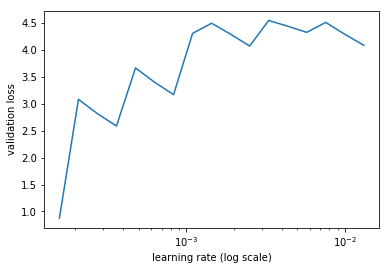

In [16]:
learn.lr_find()
learn.sched.plot()

In [12]:
lr= 1e-5

In [18]:
# learn.fit(lr, 1, cycle_len=12, use_clr=(20,10))

epoch      trn_loss   val_loss                                                                                         
    0      5.383412   28.436781 
    1      5.778614   27.321056                                                                                        
    2      6.143656   26.218418                                                                                        
    3      5.301397   25.23031                                                                                         
    4      4.917557   24.438196                                                                                        
    5      5.035095   23.810764                                                                                        
 44%|███████████████████████████████▏                                       | 22/50 [02:03<02:46,  5.96s/it, loss=5.45]

KeyboardInterrupt: 

In [13]:
learn.fit(lr, 1 , metrics = [accuracy])

epoch      trn_loss   val_loss   accuracy                                                                              
    0      5.923266   0.047373   1.0       



[array([0.04737]), 1.0]

In [14]:
learn.model.e.weight.data


-1.1176 -0.9008  1.3809  1.6837  0.9164  0.1385  1.0385 -0.2826  0.3055  0.5242
-1.2647  2.1356 -1.0410 -0.8943 -0.9157  1.3116  0.8942 -1.9661 -0.4410 -0.6819
-0.4559 -1.5062  0.6810 -1.2171 -1.0764  1.5973 -1.7418 -0.6803  0.5844  0.5720
 1.1838 -0.3708 -1.7224 -0.2067 -1.2098 -0.4927  0.8349 -1.5712 -0.2920 -1.0063
 0.1150  1.5971  1.2839  0.0868 -0.3852 -0.1080  2.1093 -0.4708  0.2581 -0.5025
-0.0190  0.8131  2.1913  0.1654 -1.3691 -0.5380 -1.2318  0.9497  0.1472  0.7970
-0.2803 -0.9904  1.2007  1.7106 -1.8151  0.3253  0.3951  0.9130  0.6569  0.8818
-2.0048 -0.9676  0.9396  1.4221 -0.8107 -1.4701  0.5106  0.6164  1.4524 -1.9406
-1.0020 -1.8475  1.3489 -0.1529 -0.2012  0.6421 -0.6865  0.3991 -0.7602  1.1199
 0.5076 -1.6257 -1.4271  0.9571  1.2446  0.5148 -0.4927 -1.5911 -0.1807  0.9738
-0.0227  1.4667  0.8387 -1.4105  0.6211 -0.0196  2.0407 -2.0615  0.9805  1.0410
 1.2179 -1.6142  0.7122  0.5823 -0.5876  0.6371  1.2541  1.7423 -1.0924  1.2968
-0.8995 -0.8590 -1.4681 -0.5591  0.2434

In [11]:
#fit(m, md, 1, opt, F.nll_loss)

epoch      trn_loss   val_loss                                                                                         
    0      11.736032  28.877022 



[array([28.87702])]

# 3rd , Embeding Metrics for all features

In [6]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

from fastai.io import *
from fastai.conv_learner import *
from fastai.column_data import *

from torchtext import vocab, data

from fastai.nlp import *
from fastai.lm_rnn import *

In [7]:
PATH = "D:/FAST.Ai/DL1/Data/Sharif/"

In [4]:
new_df = pd.read_pickle(f'{PATH}tmp/new_df')

In [8]:
new_df

0      7      8      9      10     11     12     13     14     15     \
0      170      1      1      1      1      1      1      1      1      1   
1      253      1      1      1      1      1      1      1      1      1   
2      125      1      1      1      1      1      1      1      1      1   
3      376      1      1      1      1      1      1      1      1      1   
4      223      1      1      1      1      1      1      1      1      1   
5      295      1      1      1      1      1      1      1      1      1   
6      441      1      1      1      1      1      1      1      1      1   
7      415      1      1      1      1      1      1      1      1      1   
8       40      1      1      1      1      1      1      2      1      1   
9      133      1      1      1      1      1      1      1      1      1   
10     127      1      1      1      1      1      1      1      1      1   
11     397      1      1      1      1      1      1      1      1      1   
12     453      1      1      1      1      1      1      2      1      1   
13       8      1      1      1      1      1      1      1      1      1   
14     392      1      1      1      1      1      1      1      1      1   
15      75      1      1      1      1      1      1      1      1      1   
16      65      1      1      1      1      1      1      1      1      1   
17     153      1      1      1      1      1      1      1      1      1   
18      63      1      1      1      1      1      1      1      1      1   
19     166      1      1      1      1      1      1      1      1      1   
20     412      1      1      1      1      1      1      1      1      1   
21     426      1      1      1      1      1      1      1      1      1   
22     108      1      1      1      1      1      1      1      1      1   
23     456      1      1      1      1      1      1      1      1      1   
24      89      1      1      1      1      1      1      1      1      1   
25      16      1      1      1      1      1      1      2      1      1   
26     160      1      1      1      1      1      1      1      1      1   
27     401      1      1      1      1      1      1      1      1      1   
28     157      1      1      1      1      1      1      1      1      1   
29     418      1      1      1      1      1      1      1      1      1   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
470     78      1      1      1      1      1      1      1      1      1   
471    102      1      1      1      1      1      1      1      1      1   
472    286      1      1      1      1      1      1      1      1      1   
473    134      1      1      1      1      1      1      1      1      1   
474    235      1      1      1      1      1      1      1      1      1   
475    478      1      1      1      1      1      1      1      1      1   
476     17      1      1      1      1      1      1      1      1      1   
477    386      1      1      1      1      1      1      1      1      1   
478    330      1      1      1      1      1      1      2      1      1   
479    299      1      1      1      1      1      1      1      1      1   
480    440      1      1      1      1      1      1      1      1      1   
481    290      1      1      1      1      1      1      1      1      1   
482     12      1      1      1      1      1      1      1      1      1   
483    276      1      1      1      1      1      1      1      1      1   
484    432      1      1      1      1      1      1      1      1      1   
485    396      1      1      1      1      1      1      1      1      1   
486     67      1      1      1      1      1      1      1      1      1   
487    369      1      1      1      1      1      1      1      1      1   
488    272      1      1      1      1      1      1      2      1      1   
489     88      1      1      1      1      1      1      1      1      1   
4

In [9]:
y = np.load(f'{PATH}tmp/y.npy')

In [10]:
droped_dh = pd.read_pickle(f'{PATH}tmp/dh')

In [11]:
t_droped_dh = T(droped_dh)
t_droped_dh


   46     1     1  ...     20     7     3
   61     1     1  ...      3     7     1
   36     1     1  ...     18     7     3
       ...          ⋱          ...       
   24     1     1  ...     27    11     2
    9     1     1  ...     20     7     1
   20     1     1  ...     15     7     2
[torch.LongTensor of size 100x226]

In [ ]:
t_droped_dh[:,0]

In [ ]:
t_droped_dh[1,0]

In [12]:
n_hidden = 30
n_classes = 2
num_non_seq_cols = 226
num_other_cols = 2
n_fac = 10
out_additional = 4
n_fac_T_F = 5

In [13]:
md = ColumnarModelData.from_arrays(".", [-1], new_df.values, y= y,bs=2)#.astype(float) .astype(LongTensor)

In [14]:
for i in range(1,2):
    print(i)

1


In [15]:
droped_dh[[13]]

13
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    2
9    1
10   1
11   1
12   2
13   1
14   1
15   1
16   1
17   1
18   1
19   1
20   1
21   1
22   1
23   1
24   1
25   2
26   1
27   1
28   1
29   1
..  ..
70   1
71   1
72   2
73   1
74   1
75   2
76   1
77   1
78   1
79   1
80   1
81   1
82   1
83   1
84   1
85   1
86   1
87   1
88   2
89   1
90   1
91   1
92   1
93   1
94   1
95   1
96   1
97   1
98   1
99   1

[100 rows x 1 columns]

In [19]:
class thirdNlpModel(nn.Module):
    def __init__(self,vocab_size, n_fac):
        super().__init__()
        
        self.e = nn.Embedding(vocab_size, n_fac)
        self.non_seq_e_list = []
        for k in range(9):
            self.non_seq_e_list.append(nn.Embedding(2+1,n_fac_T_F) )
        self.non_seq_e_list.append(nn.Embedding(57+1,n_fac))
        self.non_seq_e_list.append(nn.Embedding(98+1,n_fac))
        
        self.rnn = nn.GRU(n_fac, n_hidden)
        self.l  = nn.Linear(n_hidden+n_fac_T_F*9+2*n_fac+2,n_hidden*2)
        self.l2 = nn.Linear(2,out_additional)
        self.l_out = nn.Linear((n_hidden*2)*16 + out_additional ,n_classes)
        
    def forward(self,*cs):
        x = torch.stack(cs, dim=1)#.long()
        x = x.transpose(0,1)
        bs = cs[0].size(0)
        
        t=self.handle_data(bs,x)
        additional = self.l2(x[[0,226]].transpose(0,1).float())
        x = torch.cat((t,additional),1)
        x = F.tanh(x)
        x = self.l_out(x)
        x = F.log_softmax(x)
        return(x)
    
    def handle_data(self,bs,x):
        h = V(torch.zeros(1, bs, n_hidden))
        List = []
        for i in range(16):
            inp = self.e(x[num_non_seq_cols+ i*3000 : num_non_seq_cols+ ((i+1)*3000) -2000 , :])# -2000 beacause of limitation of computation
            outp,h = self.rnn(inp, h)
            
            non_seq_e_t = self.non_seq_e_list[0](x[i*14 + 1, :])
            p = 1
            for j in range(3,15):
                if (j==11 or j==12): continue
                non_seq_e_t = torch.cat((non_seq_e_t, self.non_seq_e_list[p](x[i*14 + j , :])),1)
                p+=1
            
            i_index = i*14
            continous = x[[i_index+2,i_index+12]].transpose(0,1).float()
            non_seq_e_t = torch.cat((non_seq_e_t,continous),1)
            
            out2 = self.l(torch.cat((non_seq_e_t,outp[-1]),1))
            List.append(out2)
            h = repackage_var(h)
        
        t = List[0]
        for j in range(len(List)-1):
            t = torch.cat((t,List[j+1]),1)
        return t

In [20]:
m = thirdNlpModel(19,n_fac) # 19 is equal to len(itos)

In [21]:
opt = optim.Adam(m.parameters(), 1e-2)

In [22]:
fit(m, md, 1, opt, F.nll_loss)

epoch      trn_loss   val_loss                                                                                         
    0      2.100179   4.907147  



[array([4.90715])]

In [27]:
md = ColumnarModelData.from_arrays(".", [-1], dh.values.astype(float), y= y.astype(float),bs=16)

In [28]:
def binary_loss(y , p):
    return torch.mean(-((1-y)*torch.log(1-p) + y*torch.log(p)))

In [29]:
a = T([10,6,-4])
b = T([2,8,7])
binary_loss(a,b)

TypeError: Type torch.LongTensor doesn't implement stateless method log

In [42]:
class FirstModel1(nn.Module):
    def __init__(self):
        super().__init__()
        self.l_last_out = nn.Linear(242,2)
    def forward(self,*cs):
        x = torch.stack(cs, dim=1)
        print(x.size())
        x = self.l_last_out(x)
        return(F.sigmoid(x))

In [43]:
md = ColumnarModelData.from_arrays(".", [-1], dh.values.astype(float), y= y,bs=16)

In [44]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

In [45]:
m = FirstModel1()

In [46]:
opt = optim.Adam(m.parameters(), 1e-2)

In [47]:
fit(m, md, 1, opt,F.nll_loss, metrics=[rmse]) #binary_loss ,

 14%|██████████▋                                                                | 1/7 [00:00<00:01,  5.27it/s, loss=-1]torch.Size([16, 242])
torch.Size([16, 242])
torch.Size([16, 242])
torch.Size([16, 242])
torch.Size([16, 242])
torch.Size([3, 242])
Validation:   0%|                                                                                | 0/1 [00:00<?, ?it/s]torch.Size([1, 242])



TypeError: sub received an invalid combination of arguments - got (torch.LongTensor), but expected one of:
 * (float value)
      didn't match because some of the arguments have invalid types: ([31;1mtorch.LongTensor[0m)
 * (torch.FloatTensor other)
      didn't match because some of the arguments have invalid types: ([31;1mtorch.LongTensor[0m)
 * (float value, torch.FloatTensor other)


In [16]:
type(x)

list

In [17]:
len(x)

10

In [30]:
z = x[7][1:-1]

In [37]:
z

'(t,0,f,f,f,t,f,f,f,f,0,4187483085,914,1448,f46d04cff2d024e9b3985a4a0800450005dccead400032064b0105099e4bc0a8c57023299328f997ebcd09a0581f8010039238c400000101080a12980c9104588bc640ba64028706bdd9d09dc7cc93d5a025e977817410b9edbe67194ae3028d489a765af0f58af4bc345ea3565a0c78fef36e44c207a582e6a15c06e9dfc3355b6bac8fab94475c476a98a408083bba6016926a5cf8ff2297d676d7380c2fa82c4518c278187e9897d15d9326089a8c39bd7b7d041cae33df1c07fba1da74d52c786a0fada8830acf7375d374f61f96acc33da32e3b34beb304f6c754f07f82127b96bda5fd2ca7a42fa2fa321addd8b7e66bcf8fdcf0ec587afeb0a91d25da803987af868e8cdbebaaba5c15f67e49723679834f715b3b31daf7759f5a0a7bbf7d5ff55b55dd857b21ea90d3f61823de12a2bf16a2bd66fca2a3b9b21e0a3fdcfcc2773bd7d4996d2f028659f4bab6e5d3401f4f603bfd1c7e13daa96e1f4ef0aea599d1d8840b6d3ad2c5b52ed2313d53159f8198c98a7e63c61de25d8da1148582e2fa5b681e3c5066bebd4f09aca70387e40c0a5bcb66baab7925da306966037296d89eee2e5bdd3a69810e40aec558baec6f3bbe59116c4d07baa51c6d5409b6ffc1e8eb938e48f3c662d8c90696ce7a83972714c3e159d0c668fa

In [33]:
c = z.split(",(")

In [44]:
c

['(t,0,f,f,f,t,f,f,f,f,0,4187483085,914,1448,f46d04cff2d024e9b3985a4a0800450005dccead400032064b0105099e4bc0a8c57023299328f997ebcd09a0581f8010039238c400000101080a12980c9104588bc640ba64028706bdd9d09dc7cc93d5a025e977817410b9edbe67194ae3028d489a765af0f58af4bc345ea3565a0c78fef36e44c207a582e6a15c06e9dfc3355b6bac8fab94475c476a98a408083bba6016926a5cf8ff2297d676d7380c2fa82c4518c278187e9897d15d9326089a8c39bd7b7d041cae33df1c07fba1da74d52c786a0fada8830acf7375d374f61f96acc33da32e3b34beb304f6c754f07f82127b96bda5fd2ca7a42fa2fa321addd8b7e66bcf8fdcf0ec587afeb0a91d25da803987af868e8cdbebaaba5c15f67e49723679834f715b3b31daf7759f5a0a7bbf7d5ff55b55dd857b21ea90d3f61823de12a2bf16a2bd66fca2a3b9b21e0a3fdcfcc2773bd7d4996d2f028659f4bab6e5d3401f4f603bfd1c7e13daa96e1f4ef0aea599d1d8840b6d3ad2c5b52ed2313d53159f8198c98a7e63c61de25d8da1148582e2fa5b681e3c5066bebd4f09aca70387e40c0a5bcb66baab7925da306966037296d89eee2e5bdd3a69810e40aec558baec6f3bbe59116c4d07baa51c6d5409b6ffc1e8eb938e48f3c662d8c90696ce7a83972714c3e159d0c668f

In [38]:
len(c)

16

In [41]:
q = c[0]
q = q[1:-1]
p = q.split(",")

In [42]:
p

['t',
 '0',
 'f',
 'f',
 'f',
 't',
 'f',
 'f',
 'f',
 'f',
 '0',
 '4187483085',
 '914',
 '1448',
 'f46d04cff2d024e9b3985a4a0800450005dccead400032064b0105099e4bc0a8c57023299328f997ebcd09a0581f8010039238c400000101080a12980c9104588bc640ba64028706bdd9d09dc7cc93d5a025e977817410b9edbe67194ae3028d489a765af0f58af4bc345ea3565a0c78fef36e44c207a582e6a15c06e9dfc3355b6bac8fab94475c476a98a408083bba6016926a5cf8ff2297d676d7380c2fa82c4518c278187e9897d15d9326089a8c39bd7b7d041cae33df1c07fba1da74d52c786a0fada8830acf7375d374f61f96acc33da32e3b34beb304f6c754f07f82127b96bda5fd2ca7a42fa2fa321addd8b7e66bcf8fdcf0ec587afeb0a91d25da803987af868e8cdbebaaba5c15f67e49723679834f715b3b31daf7759f5a0a7bbf7d5ff55b55dd857b21ea90d3f61823de12a2bf16a2bd66fca2a3b9b21e0a3fdcfcc2773bd7d4996d2f028659f4bab6e5d3401f4f603bfd1c7e13daa96e1f4ef0aea599d1d8840b6d3ad2c5b52ed2313d53159f8198c98a7e63c61de25d8da1148582e2fa5b681e3c5066bebd4f09aca70387e40c0a5bcb66baab7925da306966037296d89eee2e5bdd3a69810e40aec558baec6f3bbe59116c4d07baa51c6d5409

In [50]:
len(p)

15

In [43]:
p[-1]

'f46d04cff2d024e9b3985a4a0800450005dccead400032064b0105099e4bc0a8c57023299328f997ebcd09a0581f8010039238c400000101080a12980c9104588bc640ba64028706bdd9d09dc7cc93d5a025e977817410b9edbe67194ae3028d489a765af0f58af4bc345ea3565a0c78fef36e44c207a582e6a15c06e9dfc3355b6bac8fab94475c476a98a408083bba6016926a5cf8ff2297d676d7380c2fa82c4518c278187e9897d15d9326089a8c39bd7b7d041cae33df1c07fba1da74d52c786a0fada8830acf7375d374f61f96acc33da32e3b34beb304f6c754f07f82127b96bda5fd2ca7a42fa2fa321addd8b7e66bcf8fdcf0ec587afeb0a91d25da803987af868e8cdbebaaba5c15f67e49723679834f715b3b31daf7759f5a0a7bbf7d5ff55b55dd857b21ea90d3f61823de12a2bf16a2bd66fca2a3b9b21e0a3fdcfcc2773bd7d4996d2f028659f4bab6e5d3401f4f603bfd1c7e13daa96e1f4ef0aea599d1d8840b6d3ad2c5b52ed2313d53159f8198c98a7e63c61de25d8da1148582e2fa5b681e3c5066bebd4f09aca70387e40c0a5bcb66baab7925da306966037296d89eee2e5bdd3a69810e40aec558baec6f3bbe59116c4d07baa51c6d5409b6ffc1e8eb938e48f3c662d8c90696ce7a83972714c3e159d0c668fa7b883dfa8fa7473f5ba3cfcdf8a84263bc0b8baa294

In [27]:
md = ColumnarModelData.from_arrays(".", [-1], dh.values.astype(float), y= y.astype(float),bs=16)

In [28]:
def binary_loss(y , p):
    return torch.mean(-((1-y)*torch.log(1-p) + y*torch.log(p)))

In [29]:
a = T([10,6,-4])
b = T([2,8,7])
binary_loss(a,b)

TypeError: Type torch.LongTensor doesn't implement stateless method log

In [42]:
class FirstModel1(nn.Module):
    def __init__(self):
        super().__init__()
        self.l_last_out = nn.Linear(242,2)
    def forward(self,*cs):
        x = torch.stack(cs, dim=1)
        print(x.size())
        x = self.l_last_out(x)
        return(F.sigmoid(x))

In [43]:
md = ColumnarModelData.from_arrays(".", [-1], dh.values.astype(float), y= y,bs=16)

In [44]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

In [45]:
m = FirstModel1()

In [46]:
opt = optim.Adam(m.parameters(), 1e-2)

In [47]:
fit(m, md, 1, opt,F.nll_loss, metrics=[rmse]) #binary_loss ,

 14%|██████████▋                                                                | 1/7 [00:00<00:01,  5.27it/s, loss=-1]torch.Size([16, 242])
torch.Size([16, 242])
torch.Size([16, 242])
torch.Size([16, 242])
torch.Size([16, 242])
torch.Size([3, 242])
Validation:   0%|                                                                                | 0/1 [00:00<?, ?it/s]torch.Size([1, 242])



TypeError: sub received an invalid combination of arguments - got (torch.LongTensor), but expected one of:
 * (float value)
      didn't match because some of the arguments have invalid types: ([31;1mtorch.LongTensor[0m)
 * (torch.FloatTensor other)
      didn't match because some of the arguments have invalid types: ([31;1mtorch.LongTensor[0m)
 * (float value, torch.FloatTensor other)
